# EVALUATION PROJECT 9:- INSURANCE CLAIM FRAUD DETECTION
# INTERNSHIP NO. :- 66
# NAME - SUBHAM
# BATCH - DS2401

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Insurance%20Claim%20Fraud%20Detection/Automobile_insurance_fraud.csv')
df

,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES.1,71610,6510,13020,52080,Saab,92x,2004,Y
0,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
1,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
2,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
3,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
4,256,39,104594,12-10-2006,OH,250/500,1000,1351.10,0,478456,...,2,NO,64100,6410,6410,51280,Saab,95,2003,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
995,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
996,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
997,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [4]:
pd.set_option('Display.max_columns',None)

In [5]:
column_names=['months_as_customer','age','policy_number','policy_bind_date','policy_state','policy_csl',
               'policy_deductable','policy_annual_premium','umbrella_limit','insured_zip','insured_sex',
               'insured_education_level','insured_occupation','insured_hobbies','insured_relationship','capital_gains',
               'capital_loss','incident_date','incident_type','collision_type','incident_severity','authorities_contacted',
               'incident_state','incident_city','incident_location','incident_hour_of_the_day','number_of_vehicles_involved',
               'property_damage','bodily_injuries','witnesses','police_report_available','total_claim_amount','injury_claim',
               'property_claim','vehicle_claim','auto_make','auto_model','auto_year','fraud_reported']
column_names

['months_as_customer',
 'age',
 'policy_number',
 'policy_bind_date',
 'policy_state',
 'policy_csl',
 'policy_deductable',
 'policy_annual_premium',
 'umbrella_limit',
 'insured_zip',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'capital_gains',
 'capital_loss',
 'incident_date',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'incident_location',
 'incident_hour_of_the_day',
 'number_of_vehicles_involved',
 'property_damage',
 'bodily_injuries',
 'witnesses',
 'police_report_available',
 'total_claim_amount',
 'injury_claim',
 'property_claim',
 'vehicle_claim',
 'auto_make',
 'auto_model',
 'auto_year',
 'fraud_reported']

In [6]:
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Insurance%20Claim%20Fraud%20Detection/Automobile_insurance_fraud.csv',
               names=column_names)
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital_gains,capital_loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,NaN,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,craft-repair,paintball,unmarried,0,0,22-02-2015,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,6045 Andromedia St,20,1,YES,0,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,prof-specialty,sleeping,wife,70900,0,24-01-2015,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,3092 Texas Drive,23,1,YES,2,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,35100,0,23-01-2015,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,7629 5th St,4,3,?,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,handlers-cleaners,base-jumping,wife,0,0,26-02-2015,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,6128 Elm Lane,2,1,?,0,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [7]:
df.shape
# there are 1000 rows and 39 columns in the dataset

(1000, 39)

In [25]:
df.dtypes
# datatype of each column is right
# most columns are divided into int and object ,only policy annual premium column is of float datatype

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital_gains                    int64
capital_loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [ ]:
# categorical columns are:-
#'policy_bind_date','policy_state','policy_csl','insured_sex ','insured_education_level','insured_occupation','insured_hobbies',
#'insured_relationship','incident_date','incident_type','collision_type','incident_severity','authorities_contacted',
#'incident_state','incident_city','incident_location','property_damage','police_report_available','auto_make','auto_model',
#'fraud_reported'

In [8]:
df.isnull().sum()
# null value is present only in authorities_contacted column

months_as_customer              0
age                             0
policy_number                   0
policy_bind_date                0
policy_state                    0
policy_csl                      0
policy_deductable               0
policy_annual_premium           0
umbrella_limit                  0
insured_zip                     0
insured_sex                     0
insured_education_level         0
insured_occupation              0
insured_hobbies                 0
insured_relationship            0
capital_gains                   0
capital_loss                    0
incident_date                   0
incident_type                   0
collision_type                  0
incident_severity               0
authorities_contacted          91
incident_state                  0
incident_city                   0
incident_location               0
incident_hour_of_the_day        0
number_of_vehicles_involved     0
property_damage                 0
bodily_injuries                 0
witnesses     

# FILLING NULL VALUES WITH MODE

In [9]:
df['authorities_contacted'].value_counts()

authorities_contacted
Police       292
Fire         223
Other        198
Ambulance    196
Name: count, dtype: int64

In [10]:
df['authorities_contacted'].fillna('Police',inplace=True)

In [11]:
df['authorities_contacted'].value_counts()
# as there are only 1000 rows so data is less so it will be better to not drop the null values and instead fill with mode of
# the column

authorities_contacted
Police       383
Fire         223
Other        198
Ambulance    196
Name: count, dtype: int64

In [12]:
df.isnull().sum()
# no null is present in the dataset

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital_gains                  0
capital_loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [33]:
df.info()
# this shows:
# 1) there are 1000 rows and 39 columns
# 2) there are no null values in the dataset
# 3) and datatype of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [34]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')
# this show :
# 1) value counts for each unique value of each column
# 2) length represents total no. of unique values for that column
# 3) for e.g :- for age column ,43 is a unique value and it's value count is 49

months_as_customer
194    8
128    7
254    7
140    7
210    7
      ..
390    1
411    1
453    1
448    1
17     1
Name: count, Length: 391, dtype: int64


age
43    49
39    48
41    45
34    44
38    42
30    42
31    42
37    41
33    39
40    38
32    38
29    35
46    33
42    32
35    32
36    32
44    32
28    30
26    26
45    26
48    25
47    24
27    24
57    16
25    14
55    14
49    14
53    13
50    13
24    10
54    10
61    10
51     9
60     9
58     8
56     8
23     7
21     6
59     5
62     4
52     4
64     2
63     2
19     1
20     1
22     1
Name: count, dtype: int64


policy_number
521585    1
687755    1
674485    1
223404    1
991480    1
         ..
563878    1
620855    1
583169    1
337677    1
556080    1
Name: count, Length: 1000, dtype: int64


policy_bind_date
01-01-2006    3
28-04-1992    3
05-08-1992    3
14-12-1991    2
09-08-2004    2
             ..
03-06-2014    1
12-12-1998    1
18-02-1999    1
30-10-1997    1
11-11-1996    1
Name: count, L

# DESCRIPTION OF DATASET

In [35]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital_gains,capital_loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


In [13]:
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=OE.fit_transform(df[i].values.reshape(-1,1))

In [14]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital_gains,capital_loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,532.0,2.0,1.0,1000,1406.91,0,466132,1.0,4.0,2.0,17.0,0.0,53300,0,49.0,2.0,3.0,0.0,3.0,4.0,1.0,996.0,5,1,2.0,1,2,2.0,71610,6510,13020,52080,10.0,1.0,2004,1.0
1,228,42,342868,821.0,1.0,1.0,2000,1197.22,5000000,468176,1.0,4.0,6.0,15.0,2.0,0,0,41.0,3.0,0.0,1.0,3.0,5.0,5.0,628.0,8,1,0.0,0,0,0.0,5070,780,780,3510,8.0,12.0,2007,1.0
2,134,29,687698,186.0,2.0,0.0,2000,1413.14,5000000,430632,0.0,6.0,11.0,2.0,3.0,35100,0,44.0,0.0,2.0,1.0,3.0,1.0,1.0,685.0,7,3,1.0,2,3,1.0,34650,7700,3850,23100,4.0,30.0,2007,0.0
3,256,41,227811,766.0,0.0,1.0,2000,1415.74,6000000,608117,0.0,6.0,1.0,2.0,4.0,48900,-62400,19.0,2.0,1.0,0.0,3.0,2.0,0.0,669.0,5,1,0.0,1,2,1.0,63400,6340,6340,50720,3.0,34.0,2014,1.0
4,228,44,367455,181.0,0.0,2.0,1000,1583.91,6000000,610706,1.0,0.0,11.0,2.0,4.0,66000,-46000,34.0,3.0,0.0,1.0,3.0,1.0,0.0,220.0,20,1,1.0,0,1,1.0,6500,1300,650,4550,0.0,31.0,2009,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,487.0,2.0,2.0,1000,1310.80,0,431289,0.0,5.0,2.0,13.0,4.0,0,0,44.0,2.0,1.0,1.0,1.0,0.0,4.0,561.0,20,1,2.0,0,1,0.0,87200,17440,8720,61040,6.0,6.0,2006,0.0
996,285,41,186934,129.0,0.0,0.0,1000,1436.79,0,608177,0.0,6.0,9.0,17.0,5.0,70900,0,47.0,2.0,2.0,0.0,1.0,4.0,3.0,227.0,23,1,2.0,2,3,0.0,108480,18080,18080,72320,13.0,28.0,2015,0.0
997,130,34,918516,509.0,2.0,1.0,500,1383.49,3000000,442797,0.0,5.0,1.0,3.0,2.0,35100,0,45.0,0.0,3.0,1.0,3.0,0.0,0.0,746.0,4,3,0.0,2,3,2.0,67500,7500,7500,52500,11.0,19.0,1996,0.0
998,458,62,533940,573.0,0.0,2.0,2000,1356.92,5000000,441714,1.0,0.0,5.0,0.0,5.0,0,0,52.0,2.0,2.0,0.0,2.0,1.0,0.0,569.0,2,1,0.0,0,1,2.0,46980,5220,5220,36540,1.0,5.0,1998,0.0


In [15]:
df.describe()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital_gains,capital_loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,474.332000,1.01400,0.951000,1136.000000,1256.406150,1.101000e+06,501214.488000,0.463000,2.966000,6.653000,9.731000,2.416000,25126.100000,-26793.700000,29.376000,1.172000,1.666000,1.184000,1.768000,3.242000,2.966000,499.500000,11.644000,1.83900,0.94200,0.992000,1.487000,0.971000,52761.94000,7433.420000,7399.570000,37928.950000,6.546000,19.318000,2005.103000,0.247000
std,115.113174,9.140287,257063.005276,275.402851,0.83096,0.804516,611.864673,244.167395,2.297407e+06,71701.610941,0.498879,1.948497,4.019048,5.674049,1.681003,27872.187708,28104.096686,17.249875,1.081474,1.063755,0.939695,1.156509,2.155942,2.044266,288.819436,6.951373,1.01888,0.81197,0.820127,1.111335,0.810442,26401.53319,4880.951853,4824.726179,18886.252893,4.034869,11.136107,6.015861,0.431483
min,0.000000,19.000000,100804.000000,0.000000,0.00000,0.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-111100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.00000,0.000000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,0.000000,0.000000,1995.000000,0.000000
25%,115.750000,32.000000,335980.250000,233.750000,0.00000,0.000000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,1.000000,3.000000,5.000000,1.000000,0.000000,-51500.000000,14.750000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,249.750000,6.000000,1.00000,0.00000,0.000000,1.000000,0.000000,41812.50000,4295.000000,4445.000000,30292.500000,3.000000,10.000000,2000.000000,0.000000
50%,199.500000,38.000000,533135.000000,472.500000,1.00000,1.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,3.000000,7.000000,10.000000,2.000000,0.000000,-23250.000000,29.500000,1.000000,2.000000,1.000000,2.000000,4.000000,3.000000,499.500000,12.000000,1.00000,1.00000,1.000000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,7.000000,20.000000,2005.000000,0.000000
75%,276.250000,44.000000,759099.750000,713.250000,2.00000,2.000000,2000.000000,1415.695000,0.000000e+00,603251.000000,1.000000,5.000000,10.000000,15.000000,4.000000,51025.000000,0.000000,44.000000,2.000000,3.000000,2.000000,3.000000,5.000000,5.000000,749.250000,17.000000,3.00000,2.00000,2.000000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,10.000000,29.000000,2010.000000,0.000000
max,479.000000,64.000000,999435.000000,950.000000,2.00000,2.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,1.000000,6.000000,13.000000,19.000000,5.000000,100500.000000,0.000000,59.000000,3.000000,3.000000,3.000000,3.000000,6.000000,6.000000,999.000000,23.000000,4.00000,2.00000,2.000000,3.000000,2.000000,114920.00000,21450.000000,23670.000000,79560.000000,13.000000,38.000000,2015.000000,1.000000


In [ ]:
# 1) all the columns count is 1000 meaning no null value is present in the dataset
# 2) skewness is present in the dataset ,if mean > median (50%)-> right skew and if median > mean -> left skew
#    right skew: 'months_as_customer' , 'policy_number' , 'policy_bind_date' , 'policy_state' , 'policy_deducable'(highly) ,
#                'umbrella_limit' , 'insured_zip(highly)' , 'insured_sex' , 'insured_relationship' , 'capiatl_gains' ,
#                'capital_loss' , 'incident_type' , 'incident_severity' , 'number_of_vehicles_involved' , 'witnesses' , 
#                'injury_claim'(highly) , 'property_claim'(highly) , 'auto_year' , 'fraud_reported'
#    left skew: 'policy_csl' , 'policy_annual_premium' , 'insured_education_level' , 'insured_occupation' , 'insured_hobbies'
#               'incident_date' , 'collision_type' , 'authorities_contacted' , 'incident_state' , 'incident_city' ,
#               'incident_hour_of_the_day' , 'property_damage' , 'bodily_injuries' , 'police_report_available' , 
#               'total_claim_amount'(highly) , 'vehicle_claim'(highly) , 'auto_make' , 'auto_model' 
# 3) outliers are present in the dataset, if there is a jump in the value of 75% and 100% outliers maybe present
#    e.g:- 'months_as_customer'(highly) , 'age' , 'policy_annual_premium'(highly) , 'umbrella_limit' , 'capital_gains'(highly) ,
#          'capital_loss'(highly) , 'total_claim_amount'(highly) , 'injury_claim'(highly) , 'property_claim'(highly) ,
#          'vehicle_claim'(highly) , 'fraud_reported'
#
# categorical columns are:-
#'policy_bind_date','policy_state','policy_csl','insured_sex ','insured_education_level','insured_occupation','insured_hobbies',
#'insured_relationship','incident_date','incident_type','collision_type','incident_severity','authorities_contacted',
#'incident_state','incident_city','incident_location','property_damage','police_report_available','auto_make','auto_model',
#'fraud_reported'

# CHECKING SKEWNESS

In [39]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital_gains', 'capital_loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [40]:
a=['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital_gains']
b=[    'capital_loss','incident_date', 'incident_type', 'collision_type', 
       'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount']
c=['injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported']

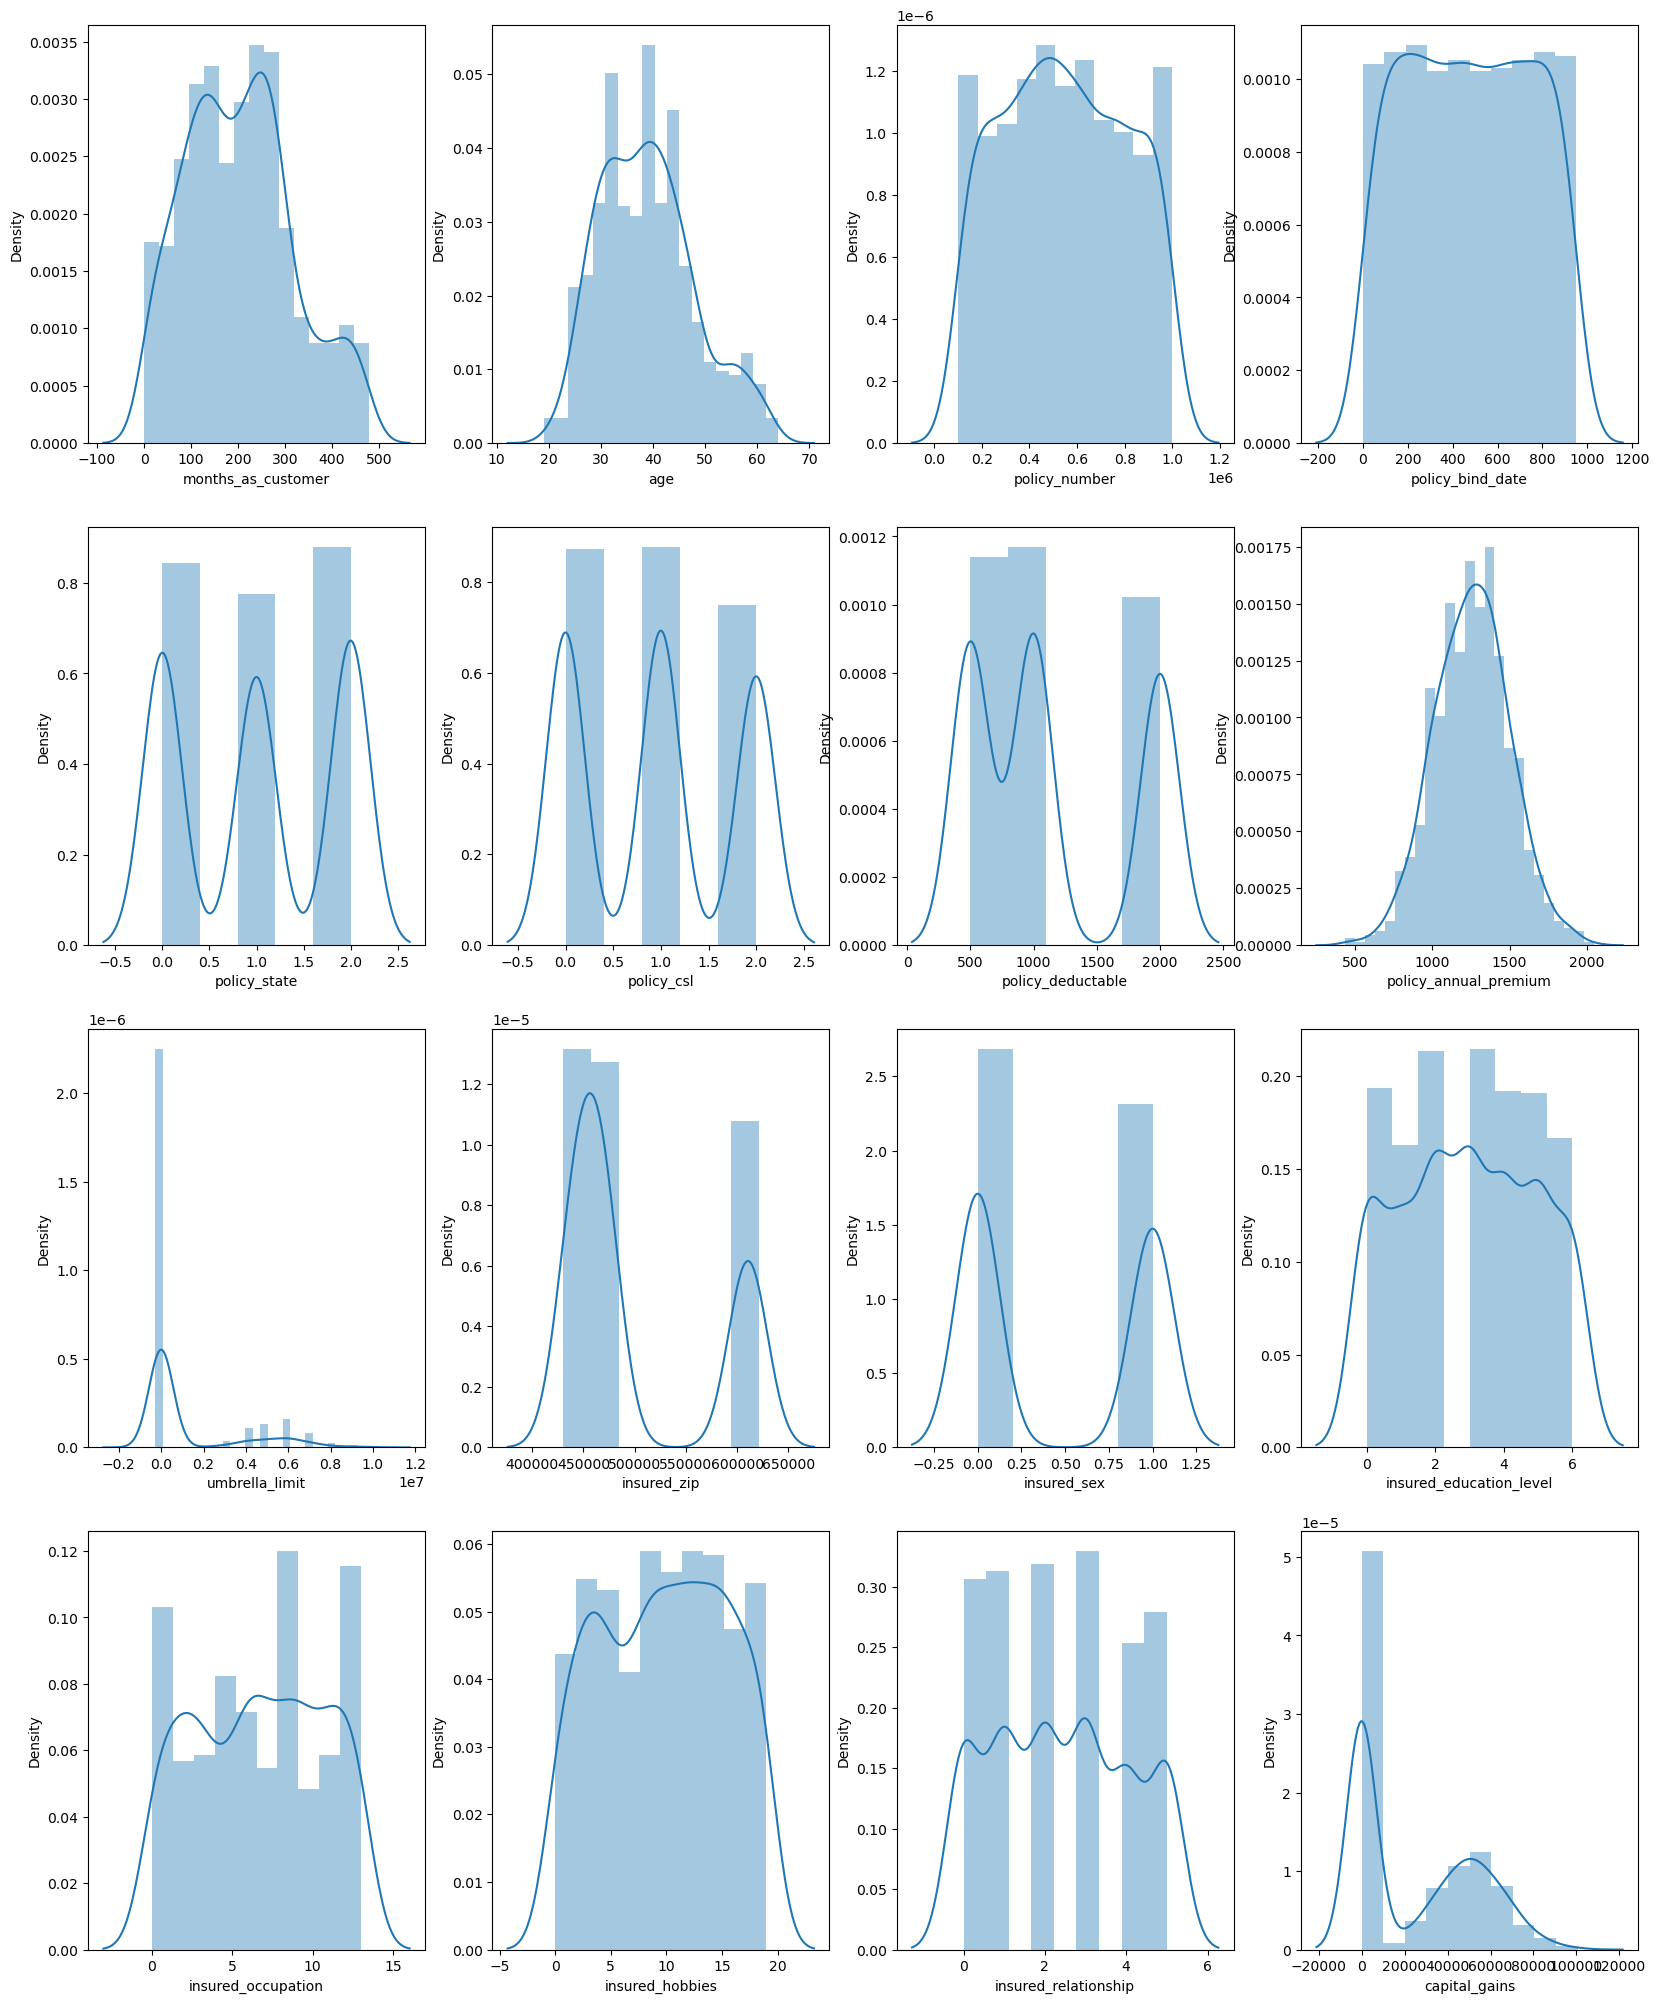

In [41]:
#for checking skewness of multiple columns at the same time
plt.figure(figsize=(20,25))
p=1
for i in a:
    if p<=16:
        ax=plt.subplot(4,4,p)
        sns.distplot(df[i])
    p+=1

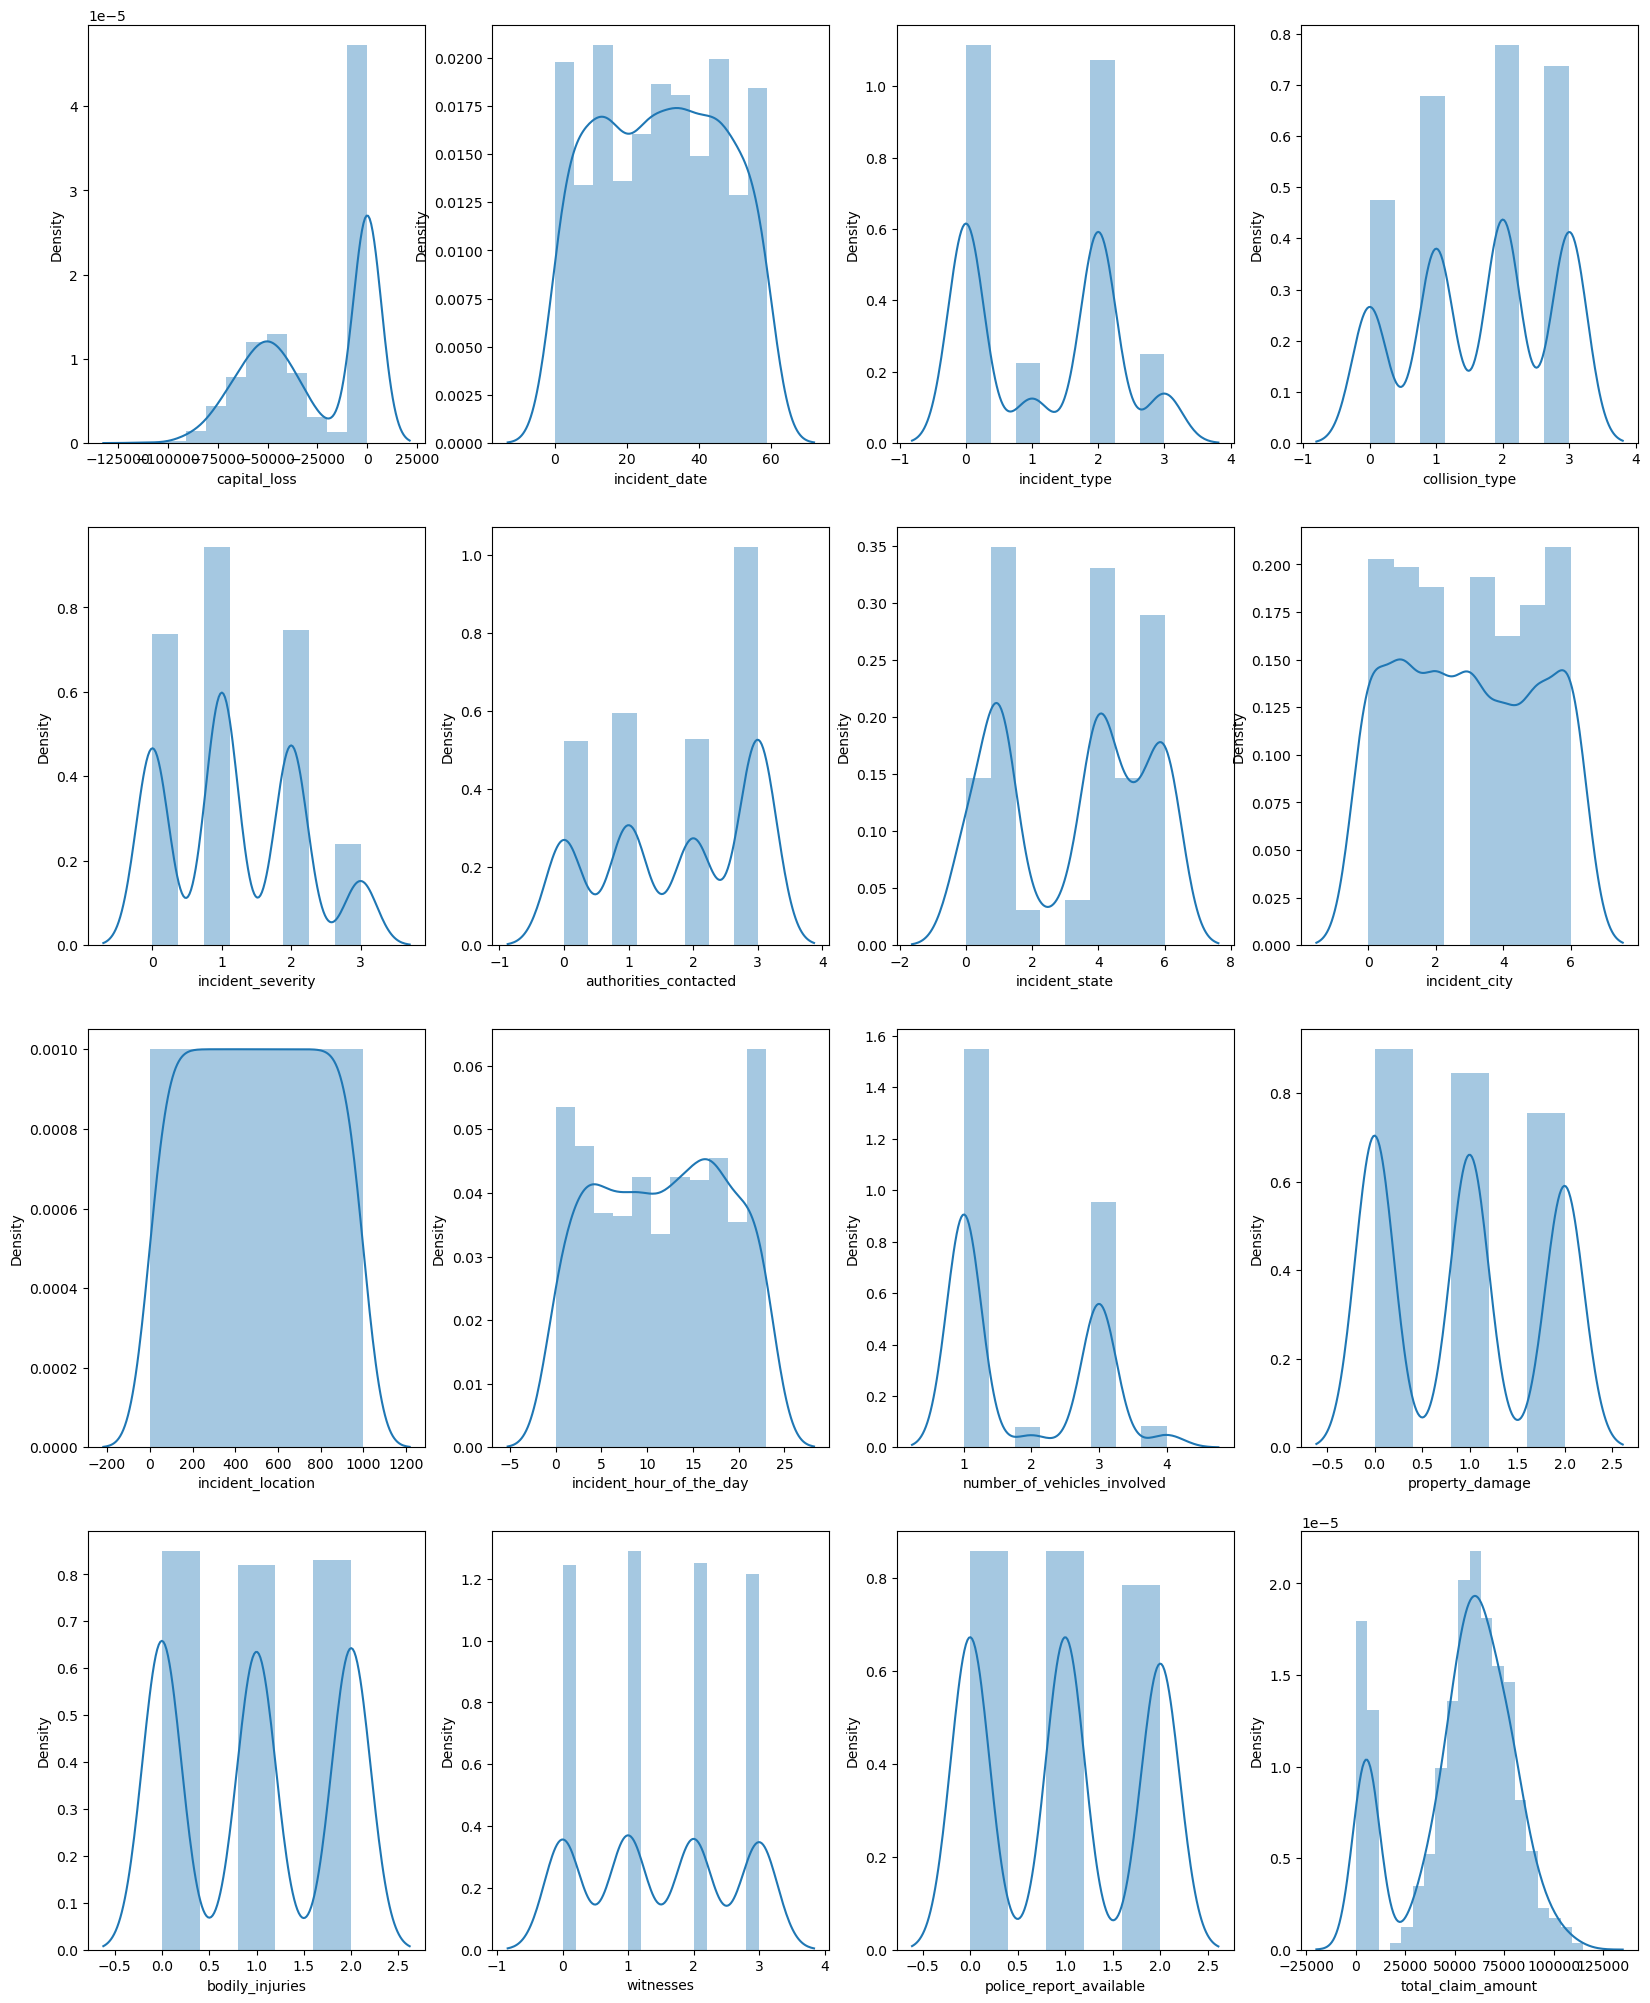

In [42]:
#for checking skewness of multiple columns at the same time
plt.figure(figsize=(20,25))
p=1
for i in b:
    if p<=16:
        ax=plt.subplot(4,4,p)
        sns.distplot(df[i])
    p+=1

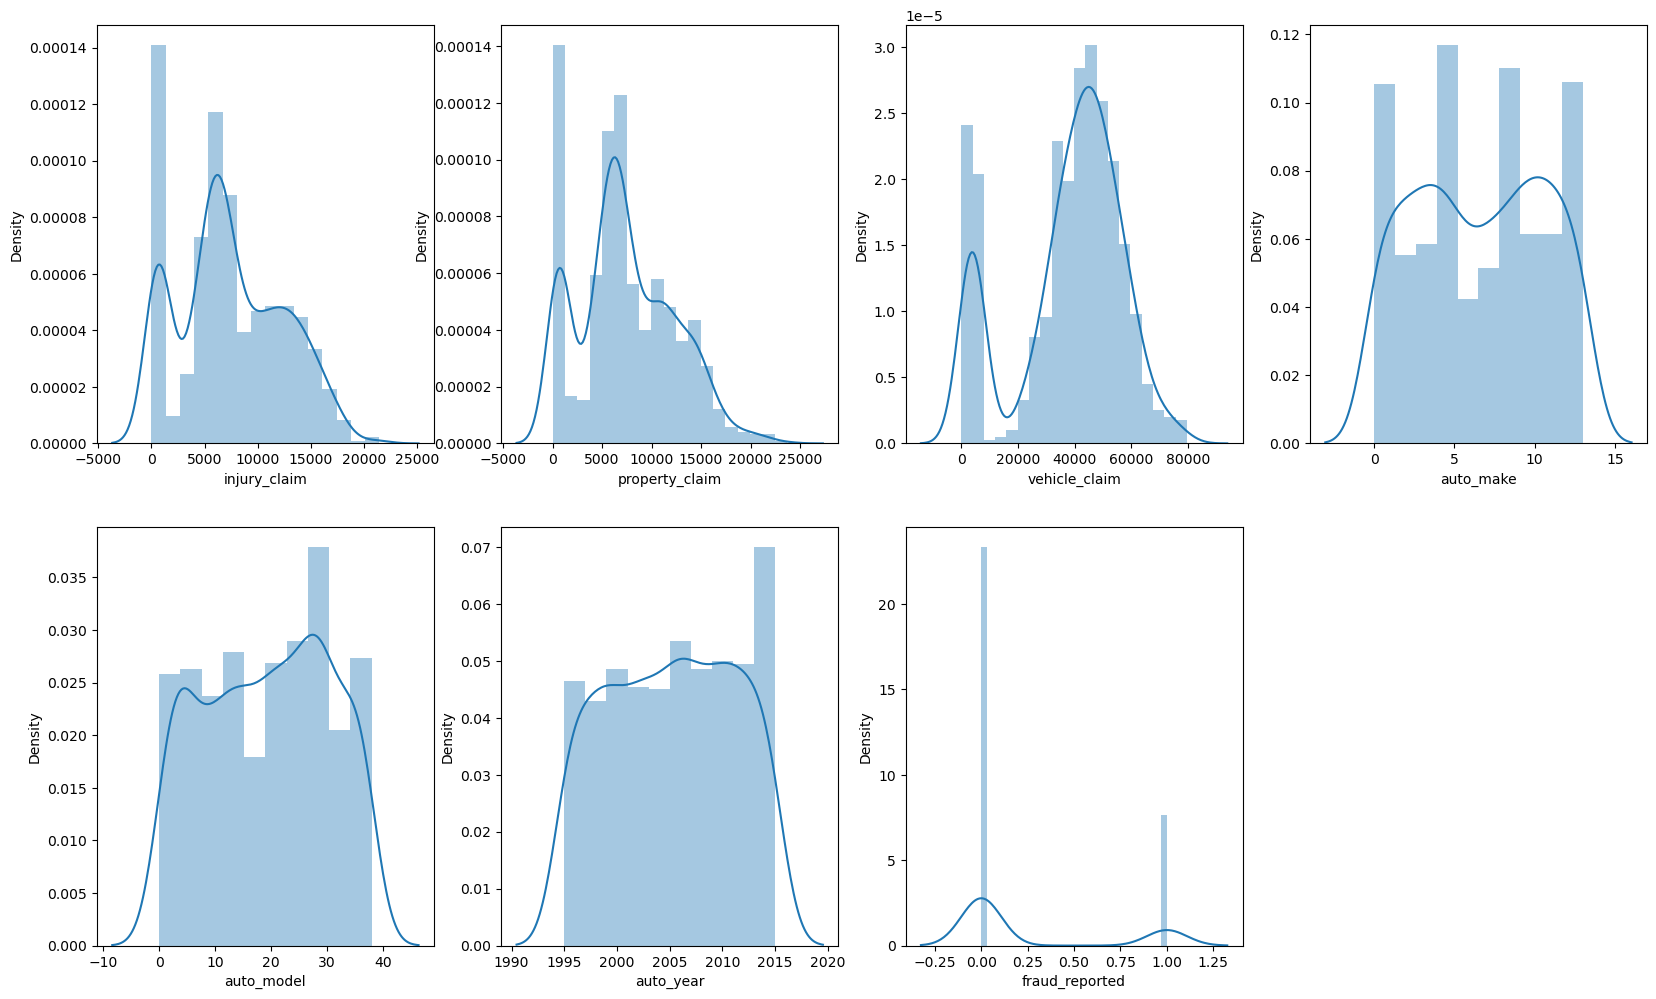

In [43]:
#for checking skewness of multiple columns at the same time
plt.figure(figsize=(20,25))
p=1
for i in c:
    if p<=16:
        ax=plt.subplot(4,4,p)
        sns.distplot(df[i])
    p+=1

In [ ]:
# we can see from the displot from above that skewness is present in some of the columns
# right skewed :- 'months_as_customer' , 'age' , 'policy_csl' , 'policy_deducable' , 'umbrella_limit' , 'insured_zip' ,
#                 'insured_sex' , 'insured_relationship' , 'capital_gains' , 'incident_type' , 'incident_severity' ,
#                 'number_of_vehicles_involved' , 'property_damage' , 'bodily_injuries' , 'police_report_available' ,
#                 'injury_claim' , 'property_claim' , fraud_reported
# left skewed :- 'capital_loss' , 'collision_type' , 'authorities_contacted' , 'incident_state' , 'incident_hour_of_the_day' ,
#                'total_claim_amount' , 'vehicle_claim' , 'auto_model' , 'auto_year'
# categorical data is:-
#'policy_bind_date','policy_state','policy_csl','insured_sex ','insured_education_level','insured_occupation','insured_hobbies',
#'insured_relationship','incident_date','incident_type','collision_type','incident_severity','authorities_contacted',
#'incident_state','incident_city','incident_location','property_damage','police_report_available','auto_make','auto_model',
#'fraud_reported'


In [16]:
#we can check numerical value of skewness too
# acceptable range of skewness is +0.5 to -0.5
df.skew()
# Positive value means the distribution is skewed to the right.
# Negative value means the distribution is skewed to the left.
# 0 means perfect normal distribution. The bell shaped curve.

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_bind_date               0.005194
policy_state                  -0.026177
policy_csl                     0.088928
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
capital_gains                  0.478850
capital_loss                  -0.391472
incident_date                  0.004756
incident_type                  0.101507
collision_type                -0.193345
incident_severity              0.279016
authorities_contacted         -0.301862
incident_state                -0.148865
incident_city                  0.049531
incident_location              0.000000


In [ ]:
'umbrella_limit' , 'insured_zip' , 'vehicle_claim'

In [17]:

#removing skewness using cuberoot method
# these are the columns which have values more or less than +0.5 and -0.5 resp.
df['umbrella_limit']=np.cbrt(df['umbrella_limit'])
df['insured_zip']=np.cbrt(df['insured_zip'])
# df['vehicle_claim']=np.cbrt(df['vehicle_claim'])
# vehicle claim skewness is increasing so it's better to not remove skewness from this 

In [18]:
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_bind_date               0.005194
policy_state                  -0.026177
policy_csl                     0.088928
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.523380
insured_zip                    0.794586
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
capital_gains                  0.478850
capital_loss                  -0.391472
incident_date                  0.004756
incident_type                  0.101507
collision_type                -0.193345
incident_severity              0.279016
authorities_contacted         -0.301862
incident_state                -0.148865
incident_city                  0.049531
incident_location              0.000000


In [19]:
df['umbrella_limit']=np.cbrt(df['umbrella_limit'])
df['insured_zip']=np.cbrt(df['insured_zip'])

In [20]:
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_bind_date               0.005194
policy_state                  -0.026177
policy_csl                     0.088928
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.474321
insured_zip                    0.786558
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
capital_gains                  0.478850
capital_loss                  -0.391472
incident_date                  0.004756
incident_type                  0.101507
collision_type                -0.193345
incident_severity              0.279016
authorities_contacted         -0.301862
incident_state                -0.148865
incident_city                  0.049531
incident_location              0.000000


In [ ]:
# skewness for umbrella_limit and insured_zip are not decreasing any further so it's best to not go any further

# CHECKING FOR OUTLIERS

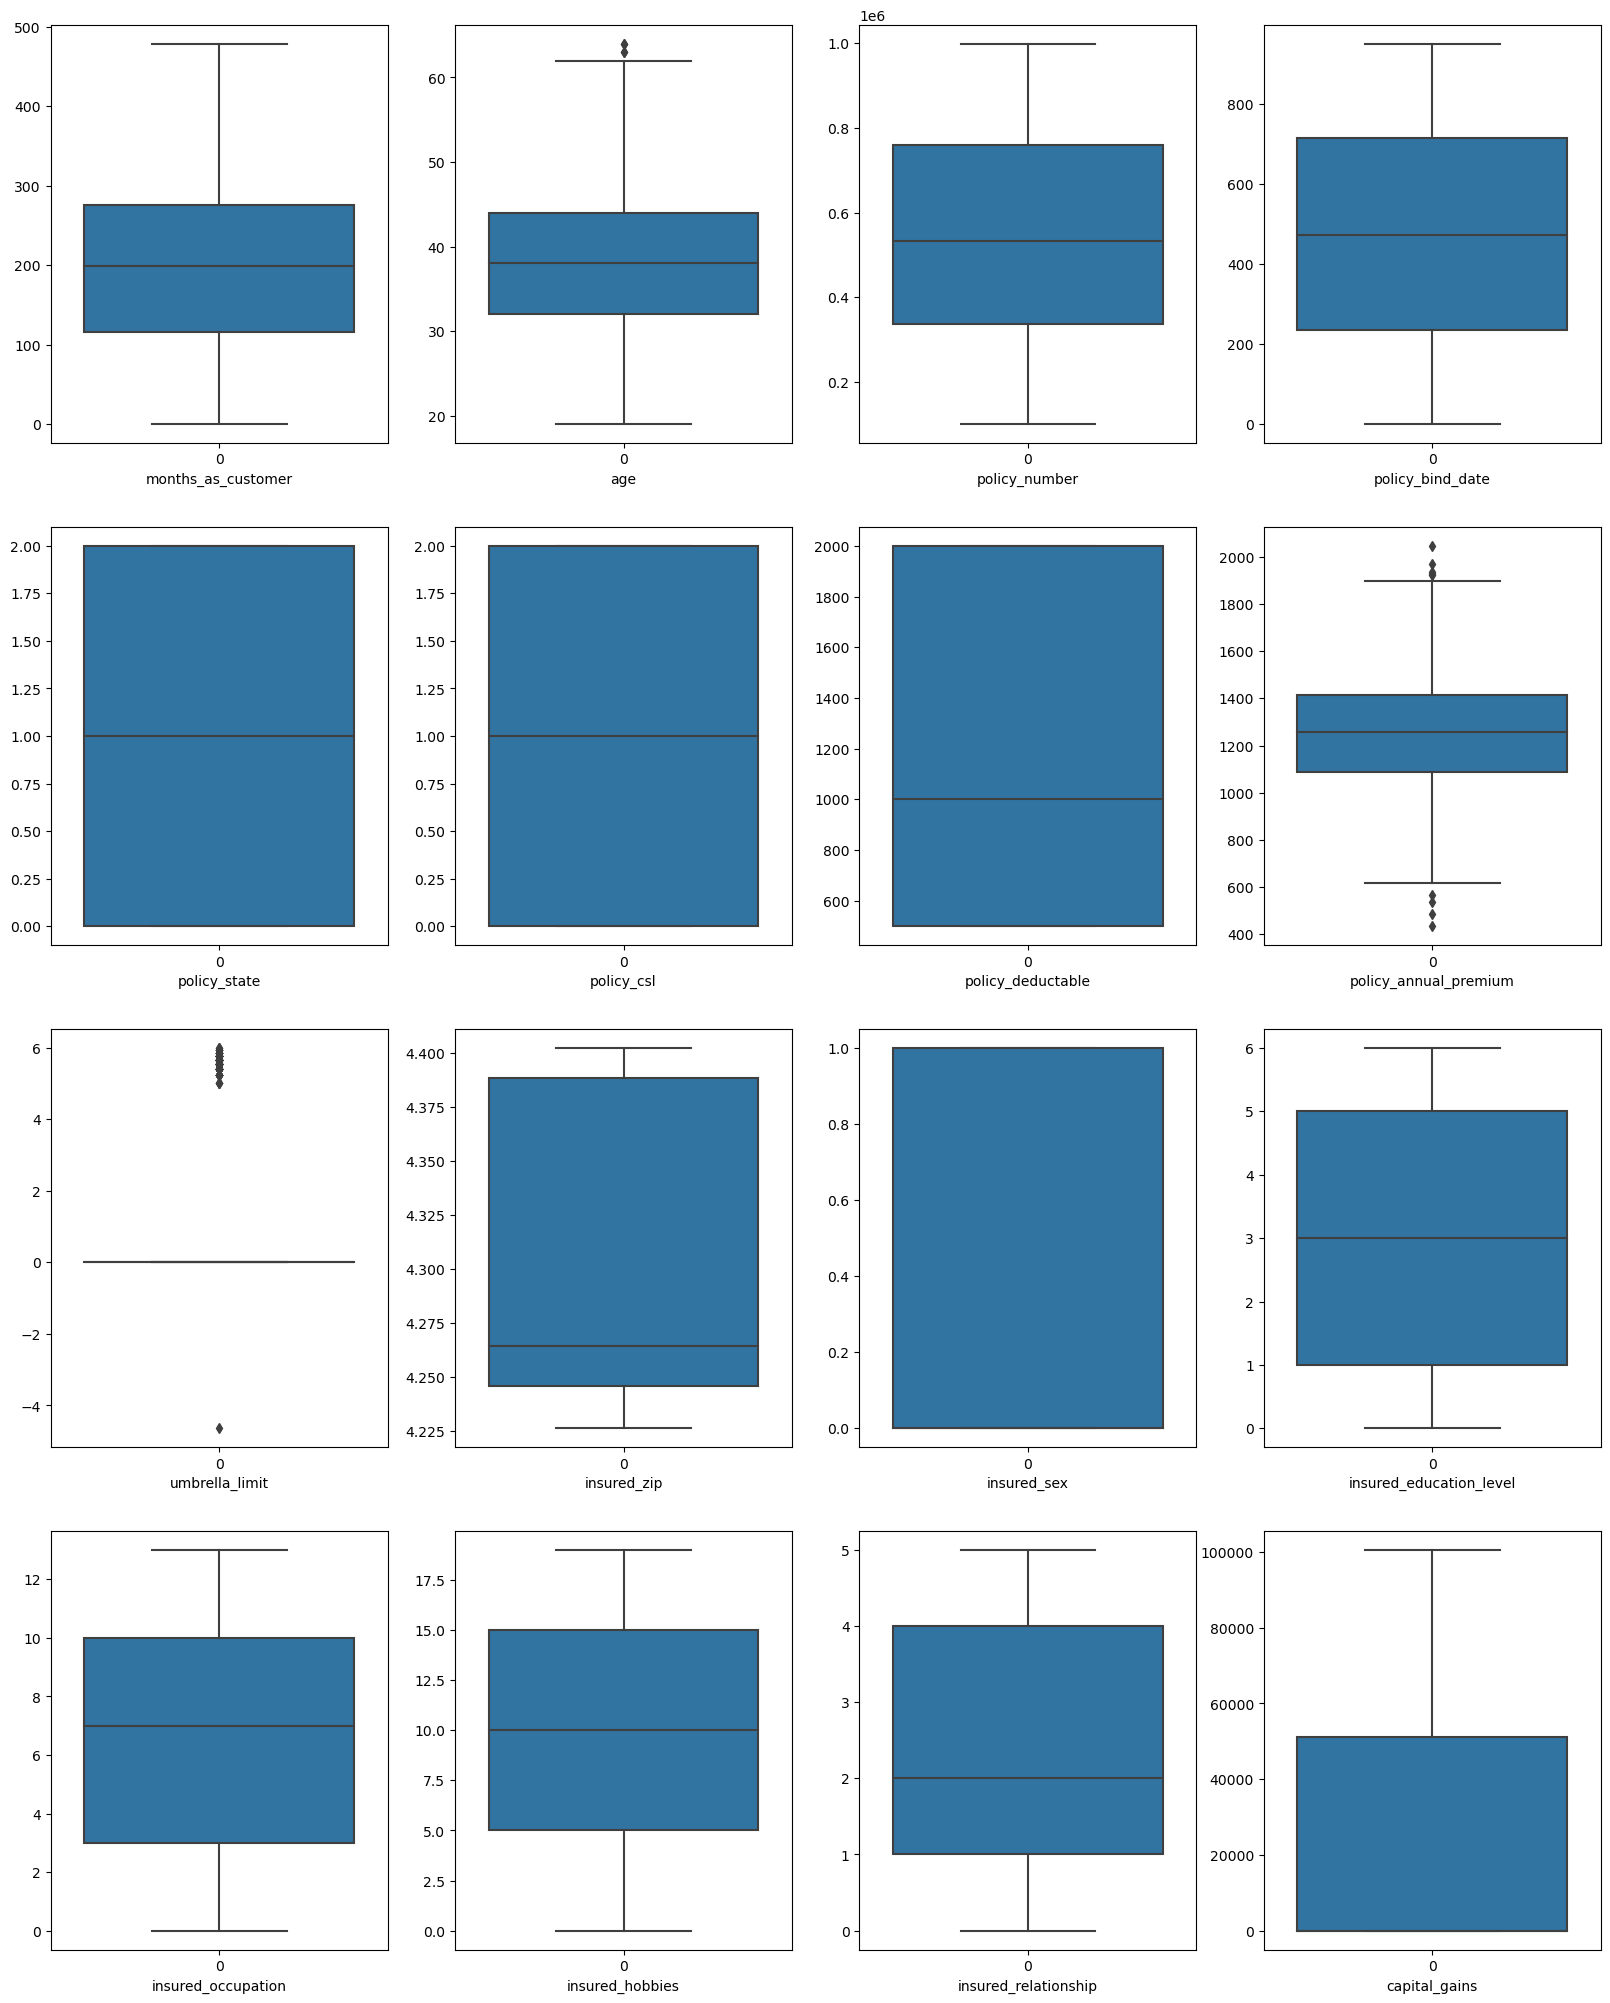

In [63]:
#check for outliers using boxplot
# for multiple boxplot visualization
plt.figure(figsize=(20,25))
p=1
for i in a :
    if p<=16:
        ax=plt.subplot(4,4,p)
        sns.boxplot(df[i])
        plt.xlabel(i)
    p+=1


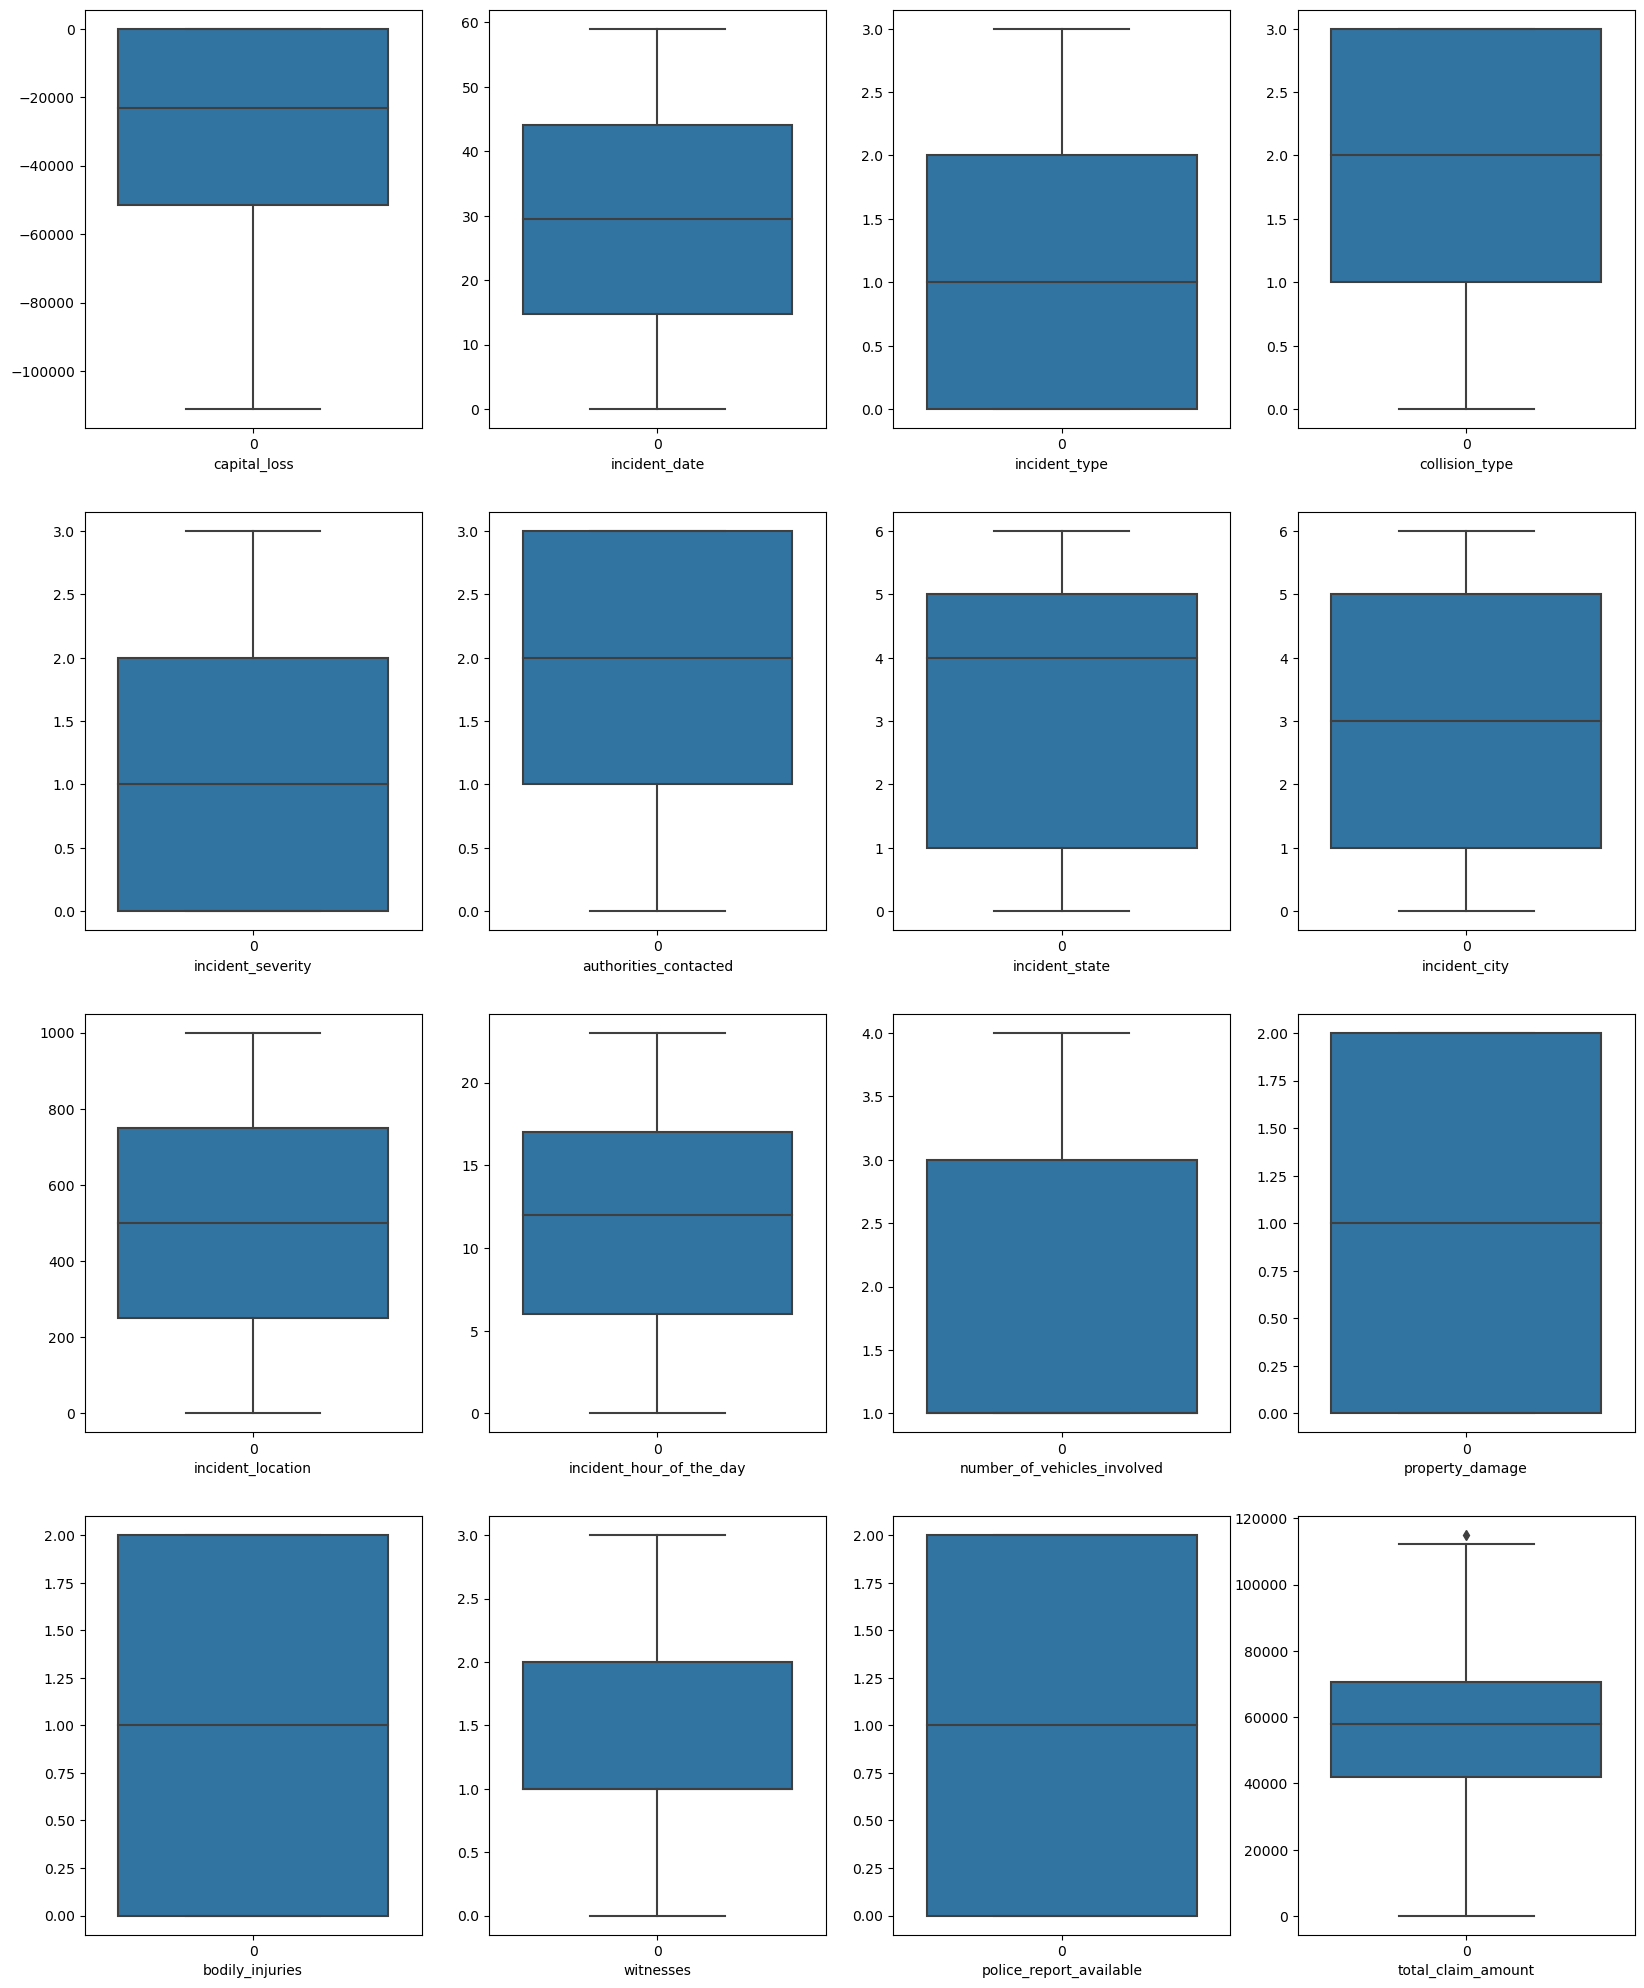

In [64]:
#check for outliers using boxplot
# for multiple boxplot visualization
plt.figure(figsize=(20,25))
p=1
for i in b :
    if p<=16:
        ax=plt.subplot(4,4,p)
        sns.boxplot(df[i])
        plt.xlabel(i)
    p+=1


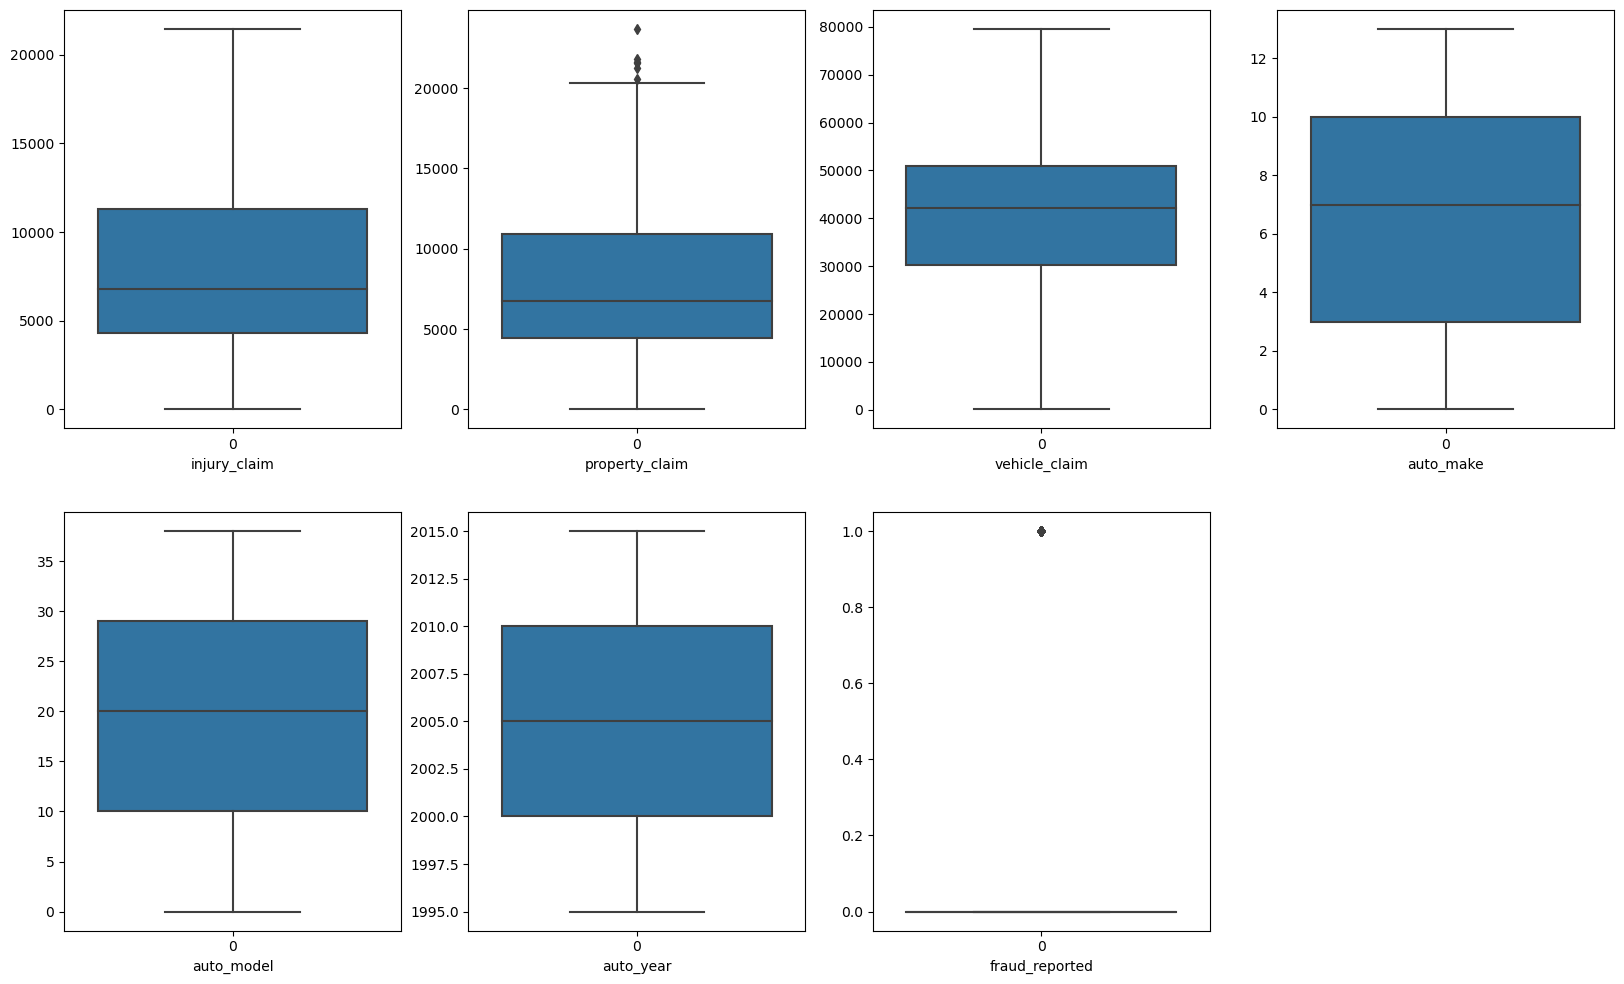

In [65]:
#check for outliers using boxplot
# for multiple boxplot visualization
plt.figure(figsize=(20,25))
p=1
for i in c :
    if p<=16:
        ax=plt.subplot(4,4,p)
        sns.boxplot(df[i])
        plt.xlabel(i)
    p+=1


In [ ]:
# we can see from boxplots that outliers are present in the dataset
# outliers are present in :- 'age' , 'policy_annual_premium' , 'umbrella_limit' , 'total_claim_amount' , 'property_claim' ,
# fraud_detection

In [66]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital_gains', 'capital_loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [21]:
#removing outliers
from scipy.stats import zscore
d=df[['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital_gains', 'capital_loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported']]
z=np.abs(zscore(d))
z

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital_gains,capital_loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,1.078140,0.990836,0.095953,0.209500,1.187173,0.060937,0.222383,0.616705,0.497594,0.465336,1.076953,0.530931,1.158316,1.281737,1.437957,1.011331,0.953851,1.138201,0.766005,1.254675,1.260614,1.065808,0.351762,0.962196,1.719927,0.956261,0.823865,1.303656,0.009759,0.461838,1.270313,0.714257,0.189283,1.165505,0.749653,0.856466,1.645743,0.183440,1.746019
1,0.208995,0.334073,0.791527,1.259397,0.016856,0.060937,1.412784,0.242521,1.972421,0.433631,1.076953,0.530931,0.162558,0.929078,0.247595,0.901927,0.953851,0.674197,1.691132,1.566933,0.195906,1.065808,0.815829,0.995476,0.445137,0.524475,0.823865,1.160722,1.210174,1.338700,1.198712,1.807312,1.363822,1.372696,1.823346,0.360539,0.657470,0.315491,1.746019
2,0.608002,1.088913,0.550566,1.047470,1.187173,1.182668,1.412784,0.642233,1.972421,1.036670,0.928546,1.557877,1.082141,1.363201,0.347586,0.358023,0.953851,0.848198,1.084249,0.314139,0.195906,1.065808,1.040437,0.962196,0.642591,0.668404,1.140056,0.071467,1.229693,1.362107,0.035801,0.686362,0.054644,0.736072,0.785565,0.631315,0.959702,0.315491,0.572731
3,0.452355,0.224613,1.239334,1.059589,1.220886,0.060937,1.412784,0.652886,2.022968,1.489632,0.928546,1.557877,1.407256,1.363201,0.942766,0.853388,1.267577,0.601813,0.766005,0.626397,1.260614,1.065808,0.576371,1.451614,0.587166,0.956261,0.823865,1.160722,0.009759,0.461838,0.035801,0.403135,0.224130,0.219722,0.677607,0.879279,1.319074,1.479664,1.746019
4,0.208995,0.552994,0.695834,1.065634,1.220886,1.304542,0.222383,1.341980,2.022968,1.521339,1.076953,1.522961,1.082141,1.363201,0.942766,1.467210,0.683741,0.268194,1.691132,1.566933,0.195906,1.065808,1.040437,1.451614,0.968217,1.202666,0.823865,0.071467,1.210174,0.438431,0.035801,1.753121,1.257232,1.399654,1.768252,1.623169,1.049545,0.648112,0.572731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.746582,0.103769,1.539740,0.046021,1.187173,1.304542,0.222383,0.222884,0.497594,1.025722,0.928546,1.044404,1.158316,0.576420,0.942766,0.901927,0.953851,0.848198,0.766005,0.626397,0.195906,0.664400,1.504504,0.506058,0.213042,1.202666,0.823865,1.303656,1.210174,0.438431,1.198712,1.305049,2.051155,0.273817,1.224309,0.135388,1.196528,0.149180,0.572731
996,0.704407,0.224613,1.398429,1.254543,1.220886,1.182668,0.222383,0.739141,0.497594,1.490368,0.928546,1.557877,0.584261,1.281737,1.537947,1.643100,0.953851,1.022200,0.766005,0.314139,1.260614,0.664400,0.351762,0.016640,0.943968,1.634452,0.823865,1.303656,1.229693,1.362107,1.198712,2.111466,2.182342,2.214794,1.821868,1.600357,0.780016,1.645974,0.572731
997,0.642767,0.541611,1.448920,0.125944,1.187173,0.060937,1.039966,0.520739,1.836131,0.836322,0.928546,1.044404,1.407256,1.186872,0.247595,0.358023,0.953851,0.906199,1.084249,1.254675,0.195906,1.065808,1.504504,1.451614,0.853901,1.100189,1.140056,1.160722,1.229693,1.362107,1.270313,0.558507,0.013648,0.020826,0.771902,1.104430,0.028570,1.513924,0.572731
998,2.208028,2.523284,0.047867,0.358447,1.220886,1.304542,1.412784,0.411866,1.972421,0.853958,1.076953,1.522961,0.411497,1.715859,1.537947,0.901927,0.953851,1.312202,0.766005,0.314139,1.260614,0.200704,1.040437,1.451614,0.240755,1.388046,0.823865,1.160722,1.210174,0.438431,1.270313,0.219110,0.453708,0.451976,0.073580,1.375206,1.286371,1.181303,0.572731


In [22]:
# above table shows z score of all columns 
# z score less than 3 contains 99.7% data
np.where(z>3)
#z score greater than 3 meaning outliers
# these values represent outliers

(array([229, 248, 500, 763, 807], dtype=int64),
 array([ 7,  7, 33,  7, 16], dtype=int64))

In [26]:
import numpy as np  
outlier_indices = np.where(z > 3)[0]
df1 = df.drop(outlier_indices)
print("Original DataFrame Shape:", df.shape)
print("DataFrame Shape after Removing Outliers:", df1.shape)
# 5 rows are removed

Original DataFrame Shape: (1000, 39)
DataFrame Shape after Removing Outliers: (995, 39)


In [24]:
import numpy as np  
outlier_indices = np.where(z > 3)[1]
df1 = df.drop(outlier_indices)
print("Original DataFrame Shape:", df.shape)
print("DataFrame Shape after Removing Outliers:", df1.shape)
# 3 rows are removed

Original DataFrame Shape: (1000, 39)
DataFrame Shape after Removing Outliers: (997, 39)


In [27]:
# 5 rows have been deleted
#this is percentage loss of data. max data that we can afford to lose is 10%
# since our value is 0.5% we lose 0.5% data which is within 10% range
#we cannot lose too much data as some data might be essential for model building
(df.shape[0]-df1.shape[0])/(df.shape[0])*100

0.5

# CHECK FOR CORRELATION AND MULTICOLLINEARITY

In [73]:
df1.corr()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital_gains,capital_loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
months_as_customer,1.000000,0.922092,0.057195,0.058487,0.000115,-0.022954,0.023763,-0.003318,0.001434,0.023870,0.058878,-0.000845,0.005500,-0.092665,0.071282,0.007940,0.020379,-0.006744,-0.017387,-0.017670,-0.061966,0.003690,0.006742,-0.001600,-0.013116,0.068797,0.013802,0.002060,-0.010936,0.063811,0.021387,0.064344,0.066612,0.041345,0.062170,0.049048,0.002689,0.001017,0.020878
age,0.922092,1.000000,0.059107,0.058436,-0.015184,-0.012423,0.026951,0.005931,-0.001328,0.030274,0.072832,0.001487,0.014124,-0.080649,0.076077,-0.006129,0.007904,-0.000766,-0.026111,-0.019956,-0.060384,0.006737,0.006945,-0.003853,-0.010969,0.085445,0.021277,-0.005688,-0.017341,0.056859,0.017298,0.070098,0.075626,0.064375,0.062025,0.031987,0.016125,0.003092,0.012348
policy_number,0.057195,0.059107,1.000000,0.047729,0.071604,0.038045,-0.004584,0.028730,-0.001280,0.005107,0.004239,-0.034144,-0.012493,0.038254,0.014975,0.012098,-0.007358,0.046537,0.003696,-0.012092,-0.014404,0.029380,-0.010929,-0.032606,0.018981,-0.001163,0.010573,0.004434,-0.002672,-0.008150,0.029653,-0.017407,-0.008552,-0.009989,-0.019570,0.017958,0.061747,-0.005670,-0.034866
policy_bind_date,0.058487,0.058436,0.047729,1.000000,0.015141,0.005870,-0.001540,-0.040878,-0.019203,-0.043008,0.044572,0.041658,0.009102,0.020282,0.015388,-0.006943,-0.019322,0.010810,0.000878,0.001852,-0.054146,-0.034132,0.043725,0.034476,-0.000648,-0.008172,-0.003722,-0.008698,-0.048153,-0.011714,-0.035910,0.010688,0.019173,0.002241,0.009408,-0.023214,0.001606,0.037935,0.061024
policy_state,0.000115,-0.015184,0.071604,0.015141,1.000000,-0.000347,0.010776,0.014483,-0.022044,0.008308,-0.019320,-0.032551,-0.031011,-0.040229,-0.018846,0.072735,-0.032470,0.026731,0.031768,0.031857,-0.026732,-0.007868,0.009181,-0.004452,0.031068,0.026468,-0.043454,0.007177,0.009021,0.024857,0.070854,-0.008486,-0.046403,0.002698,-0.000549,0.015838,-0.024562,0.002296,0.028858
policy_csl,-0.022954,-0.012423,0.038045,0.005870,-0.000347,1.000000,0.006065,0.030842,0.019602,0.002856,-0.008313,0.010379,0.019551,-0.007415,-0.031888,0.004114,-0.034360,-0.009068,0.012487,-0.037600,0.024536,0.079045,0.031995,0.010614,0.048391,-0.000460,-0.019864,-0.024269,-0.000547,0.069239,-0.000829,-0.058376,-0.080579,-0.048278,-0.048461,-0.006483,0.048485,-0.034835,-0.038765
policy_deductable,0.023763,0.026951,-0.004584,-0.001540,0.010776,0.006065,1.000000,-0.008983,0.001853,0.008271,-0.010368,0.014560,-0.051268,0.005820,-0.023132,0.033218,-0.019874,-0.023344,-0.037222,-0.033400,-0.017089,0.010054,0.008901,-0.048761,-0.007023,0.062042,0.049787,0.013931,-0.025168,0.067627,0.034674,0.023520,0.038980,0.068190,0.005452,-0.032381,-0.001652,0.029947,0.016663
policy_annual_premium,-0.003318,0.005931,0.028730,-0.040878,0.014483,0.030842,-0.008983,1.000000,-0.004643,0.048825,0.042200,-0.021483,0.030664,-0.014198,0.006123,-0.010529,0.031106,0.026972,0.049775,0.030996,-0.015715,-0.049280,0.049466,0.046888,0.012213,-0.002428,-0.045171,0.091424,0.024883,0.005857,0.020598,0.003252,-0.024420,-0.008353,0.012977,0.012124,-0.034517,-0.039869,-0.009961
umbrella_limit,0.001434,-0.001328,-0.001280,-0.019203,-0.022044,0.019602,0.001853,-0.004643,1.000000,0.010920,0.010996,-0.014077,0.018421,-0.033703,0.089063,-0.041938,-0.020485,-0.032373,0.023401,-0.016078,0.002699,0.029413,-0.068132,0.011692,0.012225,-0.020453,-0.026379,-0.064605,0.049503,-0.006703,-0.053080,-0.038794,-0.0

<Axes: >

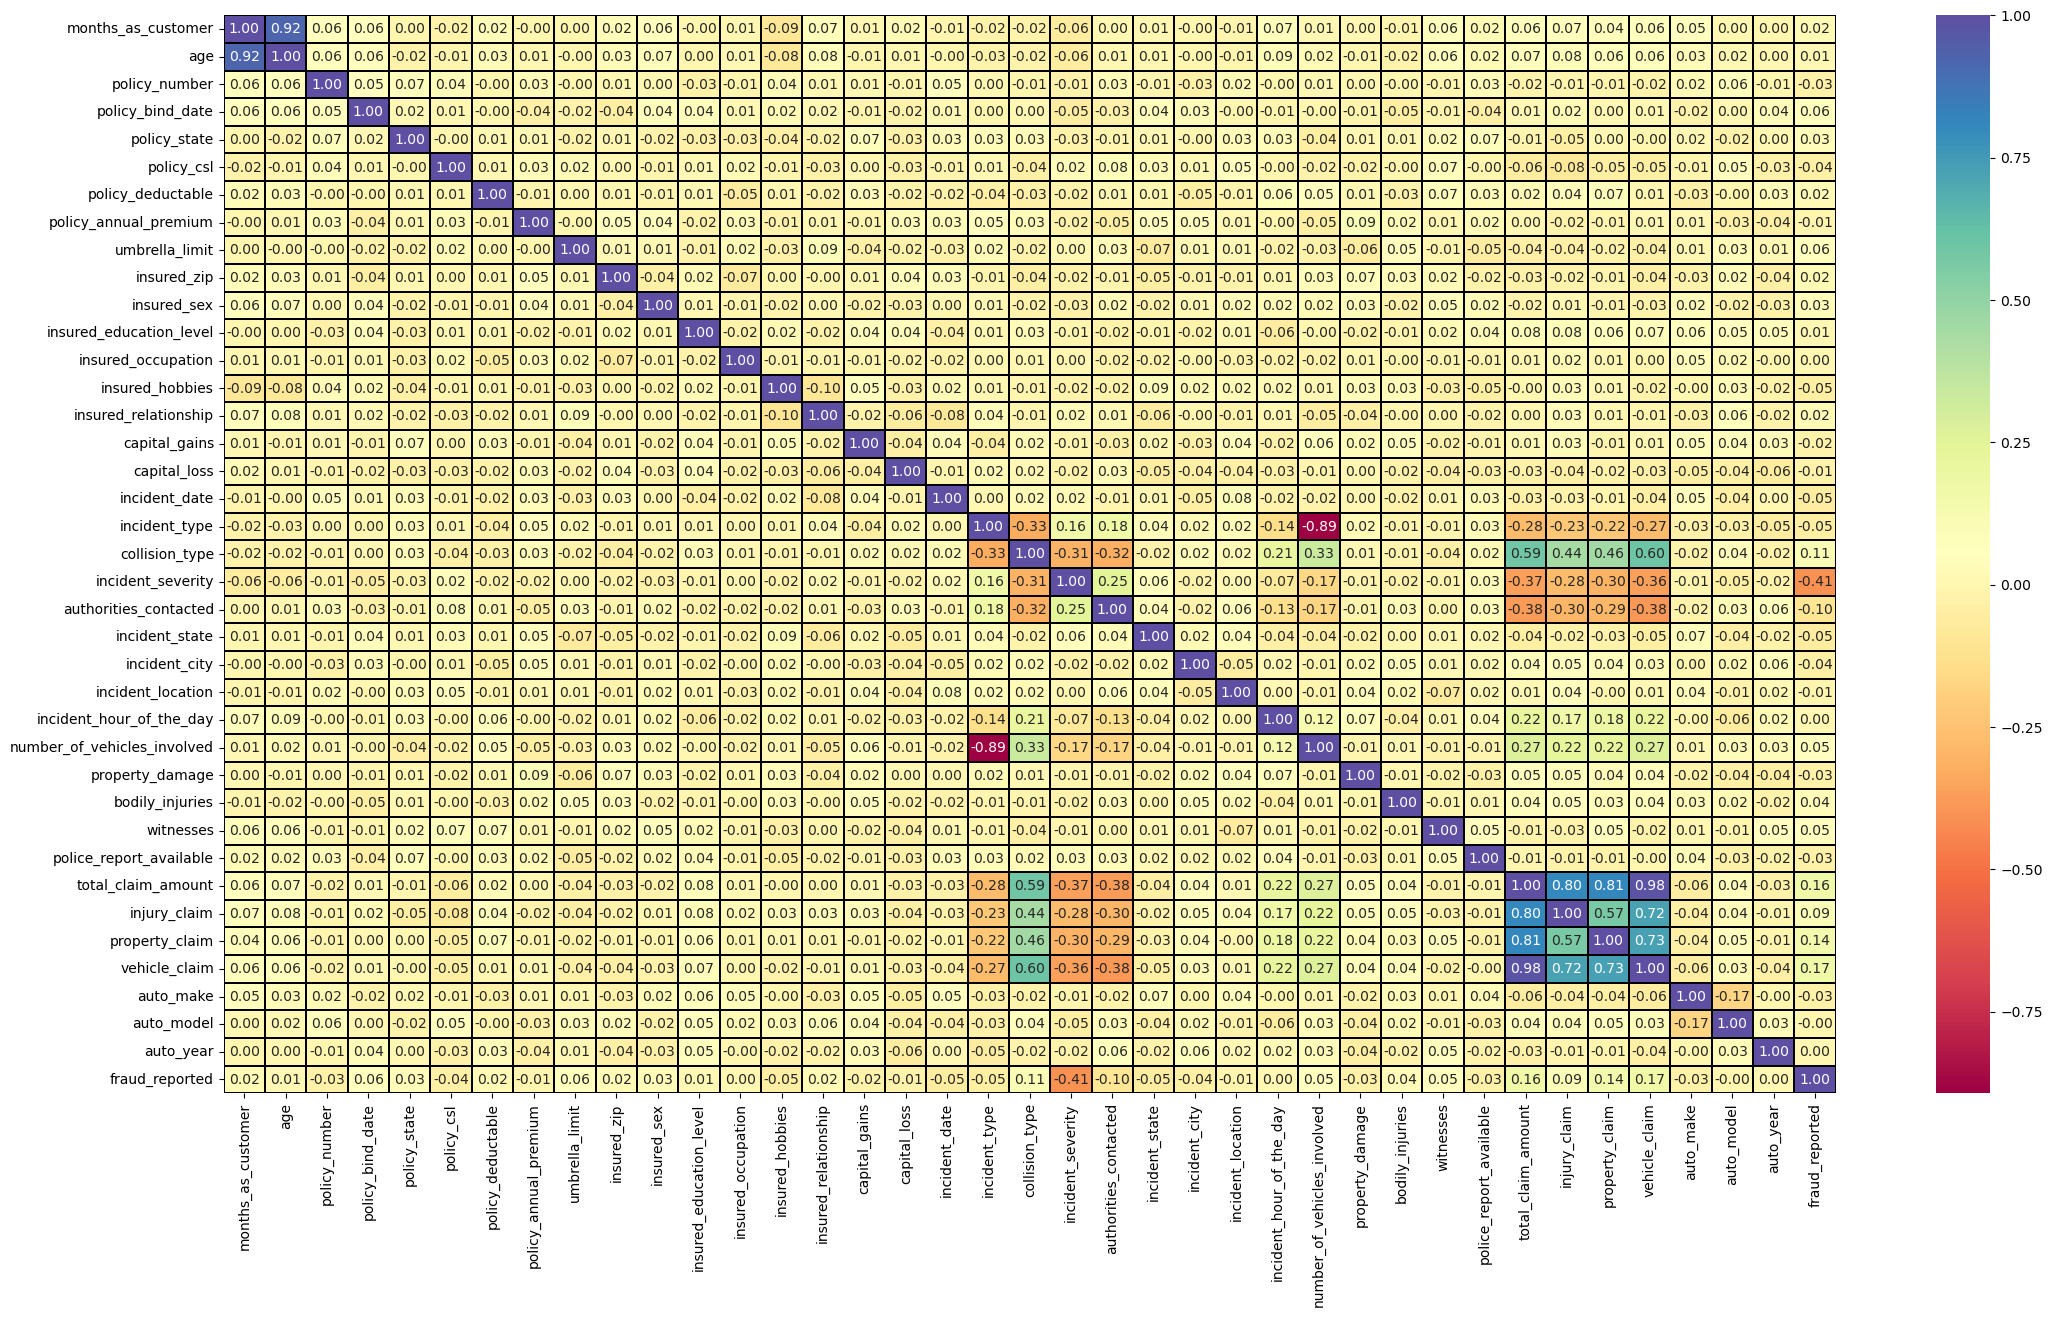

In [74]:
plt.figure(figsize=(26,14))
sns.heatmap(df1.corr(),annot=True,fmt='0.2f',linewidth=0.2,linecolor='black',cmap='Spectral')
# heat map for new dataset

In [ ]:
# 1) we can see from the above data that most of the column are not much correlated with each other
# 2) there is some correlation b/w columns which can cause multicollinearity like 'collision_type' and 'vehicle_claim'(0.60) ,
#    'collision_type' and 'property_claim'(0.46) , 'collision_type' and 'injury_claim' , 'collision_type' and 
#    'total_claim_amount'(0.59) , 'total_claim_amount'(tca) and 'vehicle_claim'(0.98) , 'tca' and 'injury_claim'(0.81) etc
# 3)'fraud_reported' which is label/target have also low correlation to other columns except for incident_sensitivity(-0.41)


In [28]:
x=df1.drop(['fraud_reported'],axis=1)
x

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital_gains,capital_loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year
0,328,48,521585,532.0,2.0,1.0,1000,1406.91,0.000000,4.264168,1.0,4.0,2.0,17.0,0.0,53300,0,49.0,2.0,3.0,0.0,3.0,4.0,1.0,996.0,5,1,2.0,1,2,2.0,71610,6510,13020,52080,10.0,1.0,2004
1,228,42,342868,821.0,1.0,1.0,2000,1197.22,5.550473,4.266242,1.0,4.0,6.0,15.0,2.0,0,0,41.0,3.0,0.0,1.0,3.0,5.0,5.0,628.0,8,1,0.0,0,0,0.0,5070,780,780,3510,8.0,12.0,2007
2,134,29,687698,186.0,2.0,0.0,2000,1413.14,5.550473,4.226801,0.0,6.0,11.0,2.0,3.0,35100,0,44.0,0.0,2.0,1.0,3.0,1.0,1.0,685.0,7,3,1.0,2,3,1.0,34650,7700,3850,23100,4.0,30.0,2007
3,256,41,227811,766.0,0.0,1.0,2000,1415.74,5.664061,4.392029,0.0,6.0,1.0,2.0,4.0,48900,-62400,19.0,2.0,1.0,0.0,3.0,2.0,0.0,669.0,5,1,0.0,1,2,1.0,63400,6340,6340,50720,3.0,34.0,2014
4,228,44,367455,181.0,0.0,2.0,1000,1583.91,5.664061,4.394103,1.0,0.0,11.0,2.0,4.0,66000,-46000,34.0,3.0,0.0,1.0,3.0,1.0,0.0,220.0,20,1,1.0,0,1,1.0,6500,1300,650,4550,0.0,31.0,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,487.0,2.0,2.0,1000,1310.80,0.000000,4.227517,0.0,5.0,2.0,13.0,4.0,0,0,44.0,2.0,1.0,1.0,1.0,0.0,4.0,561.0,20,1,2.0,0,1,0.0,87200,17440,8720,61040,6.0,6.0,2006
996,285,41,186934,129.0,0.0,0.0,1000,1436.79,0.000000,4.392078,0.0,6.0,9.0,17.0,5.0,70900,0,47.0,2.0,2.0,0.0,1.0,4.0,3.0,227.0,23,1,2.0,2,3,0.0,108480,18080,18080,72320,13.0,28.0,2015
997,130,34,918516,509.0,2.0,1.0,500,1383.49,5.244211,4.239904,0.0,5.0,1.0,3.0,2.0,35100,0,45.0,0.0,3.0,1.0,3.0,0.0,0.0,746.0,4,3,0.0,2,3,2.0,67500,7500,7500,52500,11.0,19.0,1996
998,458,62,533940,573.0,0.0,2.0,2000,1356.92,5.550473,4.238751,1.0,0.0,5.0,0.0,5.0,0,0,52.0,2.0,2.0,0.0,2.0,1.0,0.0,569.0,2,1,0.0,0,1,2.0,46980,5220,5220,36540,1.0,5.0,1998


In [29]:
y=df1['fraud_reported']
y

0      1.0
1      1.0
2      0.0
3      1.0
4      0.0
      ... 
995    0.0
996    0.0
997    0.0
998    0.0
999    0.0
Name: fraud_reported, Length: 995, dtype: float64

In [30]:
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
df2=pd.DataFrame(s.fit_transform(x),columns=x.columns)
df2

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital_gains,capital_loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year
0,1.073984,0.986592,-0.098277,0.213643,1.185517,0.063692,-0.223417,0.621478,-0.499153,-0.463469,1.074095,0.530840,-1.161280,1.279322,-1.435086,1.013699,0.954606,1.136057,0.764649,1.254123,-1.260609,1.065997,0.351527,-0.963444,1.721172,-0.961696,-0.823907,1.299333,0.008593,0.468407,1.271522,0.716696,-0.187157,1.175508,0.750846,0.856250,-1.646932,-0.184194
1,0.204584,0.330183,-0.794521,1.264051,-0.018146,0.063692,1.411141,-0.250891,1.966213,-0.431711,1.074095,0.530840,-0.165397,0.927345,-0.245656,-0.900320,0.954606,0.671121,1.689102,-1.566945,-0.197638,1.065997,0.814797,0.994935,0.445352,-0.529497,-0.823907,-1.165559,-1.212826,-1.334551,-1.197092,-1.807055,-1.362033,-1.375940,-1.822872,0.359765,-0.659116,0.315188
2,-0.612651,-1.092035,0.548864,-1.043938,1.185517,-1.178928,1.411141,0.647396,1.966213,-1.035768,-0.931017,1.556443,1.079458,-1.360507,0.349059,0.360132,0.954606,0.845472,-1.084259,0.313767,-0.197638,1.065997,-1.038285,-0.963444,0.642966,-0.673563,1.139655,0.066887,1.230012,1.369886,0.037215,-0.685135,0.056840,-0.735994,-0.784800,-0.633206,0.957311,0.315188
3,0.448016,0.220782,-1.242758,1.064146,-1.221808,0.063692,1.411141,0.658213,2.016665,1.494802,-0.931017,1.556443,-1.410251,-1.360507,0.943774,0.855694,-1.277433,-0.607455,0.764649,-0.626589,-1.260609,1.065997,-0.575014,-1.453038,0.587495,-0.961696,-0.823907,-1.165559,0.008593,0.468407,0.037215,0.405305,-0.222014,-0.216949,0.678780,-0.881449,1.316517,1.480413
4,0.204584,0.548986,-0.698735,-1.062112,-1.221808,1.306313,-0.223417,1.357847,2.016665,1.526562,1.074095,-1.520366,1.079458,-1.360507,0.943774,1.469760,-0.690808,0.264301,1.689102,-1.566945,-0.197638,1.065997,-1.038285,-1.453038,-0.969144,1.199296,-0.823907,0.066887,-1.212826,-0.433072,0.037215,-1.752817,-1.255413,-1.403039,-1.767762,-1.626177,1.047112,0.648109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,-1.751565,-0.107422,1.538990,0.050085,1.185517,1.306313,-0.223417,0.221633,-0.499153,-1.024802,-0.931017,1.043641,-1.161280,0.575368,0.943774,-0.900320,0.954606,0.845472,0.764649,-0.626589,-0.197638,-0.664292,-1.501555,0.505340,0.213070,1.199296,-0.823907,1.299333,-1.212826,-0.433072,-1.197092,1.307999,2.053925,0.279166,1.225636,-0.136721,-1.197925,0.148727
991,0.700142,0.220782,-1.402007,-1.251112,-1.221808,-1.178928,-0.223417,0.745787,-0.499153,1.495540,-0.931017,1.556443,0.581516,1.279322,1.538489,1.645720,0.954606,1.019823,0.764649,0.313767,-1.260609,-0.664292,0.351527,0.015746,-0.944875,1.631495,-0.823907,1.299333,1.230012,1.369886,-1.197092,2.115114,2.185151,2.230274,1.823361,1.600979,0.777708,1.646873
992,-0.647427,-0.545028,1.448081,0.130047,1.185517,0.063692,-1.040696,0.524044,1.830180,-0.835082,-0.931017,1.043641,-1.410251,-1.184518,-0.245656,0.360132,0.954606,0.903589,-1.084259,1.254123,-0.197638,1.065997,-1.501555,-1.453038,0.854447,-1.105762,1.139655,-1.165559,1.230012,1.369886,1.271522,0.560811,0.015832,0.024855,0.773102,1.104493,-0.030505,-1.515880
993,2.204203,2.518212,-0.050145,0.362663,-1.221808,1.306313,1.411141,0.413506,1.966213,-0.852748,1.074095,-1.520366,-0.414368,-1.712484,1.538489,-0.900320,0.954606,1.310408,0.764649,0.313767,-1.260609,0.200853,-1.038285,-1.453038,0.240805,-1.393894,-0.823907,-1.165559,-1.212826,-0.433072,1.271522,-0.217478,-0.451658,-0.450415,-0.072616,-1.377934,

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(df2.values,i) for i in range(len(df2.columns))]
vif['features']=df2.columns
vif

,VIF values,features
0,6.833568,months_as_customer
1,6.851064,age
2,1.029638,policy_number
3,1.029776,policy_bind_date
4,1.037133,policy_state
5,1.034158,policy_csl
6,1.038888,policy_deductable
7,1.041189,policy_annual_premium
8,1.031380,umbrella_limit
9,1.036564,insured_zip


In [32]:
df3=df2.drop(['property_claim'],axis=1)
df3

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital_gains,capital_loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,vehicle_claim,auto_make,auto_model,auto_year
0,1.073984,0.986592,-0.098277,0.213643,1.185517,0.063692,-0.223417,0.621478,-0.499153,-0.463469,1.074095,0.530840,-1.161280,1.279322,-1.435086,1.013699,0.954606,1.136057,0.764649,1.254123,-1.260609,1.065997,0.351527,-0.963444,1.721172,-0.961696,-0.823907,1.299333,0.008593,0.468407,1.271522,0.716696,-0.187157,0.750846,0.856250,-1.646932,-0.184194
1,0.204584,0.330183,-0.794521,1.264051,-0.018146,0.063692,1.411141,-0.250891,1.966213,-0.431711,1.074095,0.530840,-0.165397,0.927345,-0.245656,-0.900320,0.954606,0.671121,1.689102,-1.566945,-0.197638,1.065997,0.814797,0.994935,0.445352,-0.529497,-0.823907,-1.165559,-1.212826,-1.334551,-1.197092,-1.807055,-1.362033,-1.822872,0.359765,-0.659116,0.315188
2,-0.612651,-1.092035,0.548864,-1.043938,1.185517,-1.178928,1.411141,0.647396,1.966213,-1.035768,-0.931017,1.556443,1.079458,-1.360507,0.349059,0.360132,0.954606,0.845472,-1.084259,0.313767,-0.197638,1.065997,-1.038285,-0.963444,0.642966,-0.673563,1.139655,0.066887,1.230012,1.369886,0.037215,-0.685135,0.056840,-0.784800,-0.633206,0.957311,0.315188
3,0.448016,0.220782,-1.242758,1.064146,-1.221808,0.063692,1.411141,0.658213,2.016665,1.494802,-0.931017,1.556443,-1.410251,-1.360507,0.943774,0.855694,-1.277433,-0.607455,0.764649,-0.626589,-1.260609,1.065997,-0.575014,-1.453038,0.587495,-0.961696,-0.823907,-1.165559,0.008593,0.468407,0.037215,0.405305,-0.222014,0.678780,-0.881449,1.316517,1.480413
4,0.204584,0.548986,-0.698735,-1.062112,-1.221808,1.306313,-0.223417,1.357847,2.016665,1.526562,1.074095,-1.520366,1.079458,-1.360507,0.943774,1.469760,-0.690808,0.264301,1.689102,-1.566945,-0.197638,1.065997,-1.038285,-1.453038,-0.969144,1.199296,-0.823907,0.066887,-1.212826,-0.433072,0.037215,-1.752817,-1.255413,-1.767762,-1.626177,1.047112,0.648109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,-1.751565,-0.107422,1.538990,0.050085,1.185517,1.306313,-0.223417,0.221633,-0.499153,-1.024802,-0.931017,1.043641,-1.161280,0.575368,0.943774,-0.900320,0.954606,0.845472,0.764649,-0.626589,-0.197638,-0.664292,-1.501555,0.505340,0.213070,1.199296,-0.823907,1.299333,-1.212826,-0.433072,-1.197092,1.307999,2.053925,1.225636,-0.136721,-1.197925,0.148727
991,0.700142,0.220782,-1.402007,-1.251112,-1.221808,-1.178928,-0.223417,0.745787,-0.499153,1.495540,-0.931017,1.556443,0.581516,1.279322,1.538489,1.645720,0.954606,1.019823,0.764649,0.313767,-1.260609,-0.664292,0.351527,0.015746,-0.944875,1.631495,-0.823907,1.299333,1.230012,1.369886,-1.197092,2.115114,2.185151,1.823361,1.600979,0.777708,1.646873
992,-0.647427,-0.545028,1.448081,0.130047,1.185517,0.063692,-1.040696,0.524044,1.830180,-0.835082,-0.931017,1.043641,-1.410251,-1.184518,-0.245656,0.360132,0.954606,0.903589,-1.084259,1.254123,-0.197638,1.065997,-1.501555,-1.453038,0.854447,-1.105762,1.139655,-1.165559,1.230012,1.369886,1.271522,0.560811,0.015832,0.773102,1.104493,-0.030505,-1.515880
993,2.204203,2.518212,-0.050145,0.362663,-1.221808,1.306313,1.411141,0.413506,1.966213,-0.852748,1.074095,-1.520366,-0.414368,-1.712484,1.538489,-0.900320,0.954606,1.310408,0.764649,0.313767,-1.260609,0.200853,-1.038285,-1.453038,0.240805,-1.393894,-0.823907,-1.165559,-1.212826,-0.433072,1.271522,-0.217478,-0.451658,-0.072616,-1.377934,-1.287726,-1.182958


In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(df3.values,i) for i in range(len(df3.columns))]
vif['features']=df3.columns
vif

,VIF values,features
0,6.833568,months_as_customer
1,6.851064,age
2,1.029638,policy_number
3,1.029776,policy_bind_date
4,1.037133,policy_state
5,1.034158,policy_csl
6,1.038888,policy_deductable
7,1.041189,policy_annual_premium
8,1.031380,umbrella_limit
9,1.036564,insured_zip


# EQUALING THE DATA

In [34]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()

In [35]:
x1,y1=sm.fit_resample(df3,y)

In [36]:
x1

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital_gains,capital_loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,vehicle_claim,auto_make,auto_model,auto_year
0,1.073984,0.986592,-0.098277,0.213643,1.185517,0.063692,-0.223417,0.621478,-0.499153,-0.463469,1.074095,0.530840,-1.161280,1.279322,-1.435086,1.013699,0.954606,1.136057,0.764649,1.254123,-1.260609,1.065997,0.351527,-0.963444,1.721172,-0.961696,-0.823907,1.299333,0.008593,0.468407,1.271522,0.716696,-0.187157,0.750846,0.856250,-1.646932,-0.184194
1,0.204584,0.330183,-0.794521,1.264051,-0.018146,0.063692,1.411141,-0.250891,1.966213,-0.431711,1.074095,0.530840,-0.165397,0.927345,-0.245656,-0.900320,0.954606,0.671121,1.689102,-1.566945,-0.197638,1.065997,0.814797,0.994935,0.445352,-0.529497,-0.823907,-1.165559,-1.212826,-1.334551,-1.197092,-1.807055,-1.362033,-1.822872,0.359765,-0.659116,0.315188
2,-0.612651,-1.092035,0.548864,-1.043938,1.185517,-1.178928,1.411141,0.647396,1.966213,-1.035768,-0.931017,1.556443,1.079458,-1.360507,0.349059,0.360132,0.954606,0.845472,-1.084259,0.313767,-0.197638,1.065997,-1.038285,-0.963444,0.642966,-0.673563,1.139655,0.066887,1.230012,1.369886,0.037215,-0.685135,0.056840,-0.784800,-0.633206,0.957311,0.315188
3,0.448016,0.220782,-1.242758,1.064146,-1.221808,0.063692,1.411141,0.658213,2.016665,1.494802,-0.931017,1.556443,-1.410251,-1.360507,0.943774,0.855694,-1.277433,-0.607455,0.764649,-0.626589,-1.260609,1.065997,-0.575014,-1.453038,0.587495,-0.961696,-0.823907,-1.165559,0.008593,0.468407,0.037215,0.405305,-0.222014,0.678780,-0.881449,1.316517,1.480413
4,0.204584,0.548986,-0.698735,-1.062112,-1.221808,1.306313,-0.223417,1.357847,2.016665,1.526562,1.074095,-1.520366,1.079458,-1.360507,0.943774,1.469760,-0.690808,0.264301,1.689102,-1.566945,-0.197638,1.065997,-1.038285,-1.453038,-0.969144,1.199296,-0.823907,0.066887,-1.212826,-0.433072,0.037215,-1.752817,-1.255413,-1.767762,-1.626177,1.047112,0.648109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1493,-0.958813,-1.454472,-1.119873,-0.541617,-0.845176,0.063692,-0.223417,-0.098265,-0.499153,0.162986,0.446686,-0.686648,-0.756501,1.003983,-1.026460,-0.900320,0.954606,-0.599955,-0.505726,0.313767,-1.260609,-0.340563,0.669838,1.178137,0.003422,-1.015604,-0.149330,1.299333,0.847824,0.468407,0.423436,0.106634,0.374174,0.136852,-0.214397,-0.877825,-0.172914
1494,-1.356839,-0.873232,0.680925,1.303207,-0.986037,0.307094,1.090967,0.216396,-0.499153,-0.595119,-0.931017,-0.193424,-0.121761,0.441106,-1.435086,-0.900320,0.170212,1.461992,-1.084259,0.313767,-1.260609,-0.664292,-1.410811,0.303448,-0.935011,0.391338,1.139655,-0.924151,-0.230656,-0.804813,0.278988,0.060689,0.438339,-0.201506,-0.789315,1.622953,1.219565
1495,-0.254391,-0.201749,0.103537,1.359999,-0.671156,0.737838,0.663363,0.347234,1.993584,1.618967,-0.013717,-1.007565,0.446444,-0.429984,-0.245656,-0.119978,-1.201362,-0.901106,-1.084259,-0.196395,-0.683926,-0.590720,-0.496222,1.484530,-0.953534,0.478966,1.139655,0.630706,0.567368,0.880816,1.271522,0.338512,-0.258121,0.277503,0.195964,0.308690,-0.635735
1496,1.102487,1.031572,1.604284,-0.907126,-0.400635,0.063692,-0.223417,1.424263,-0.499153,0.811954,1.074095,1.067581,-0.165397,-0.913113,-0.084437,1.442350,0.578370,1.600994,-1.084259,1.254123,-1.260609,-0.074066,0.836425,0.706633,-0.426599,-1.073433,1.139655,-0.324750,1.230012,-0.146608,0.487067,0.829312,1.067969,0.704088,1.522094,0.235517,0.716548


In [37]:
y1

0       1.0
1       1.0
2       0.0
3       1.0
4       0.0
       ... 
1493    1.0
1494    1.0
1495    1.0
1496    1.0
1497    1.0
Name: fraud_reported, Length: 1498, dtype: float64

In [38]:
y1.value_counts()

fraud_reported
1.0    749
0.0    749
Name: count, dtype: int64

In [ ]:
# all values are equally distributed using imblearn resample

# MODEL BUILDING

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [73]:
maxacc1=0
maxrs1=0
for i in range(1,200):
    x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.30,random_state=i)
    rfc=RandomForestClassifier()
    rfc.fit(x1_train,y1_train)
    pred1=rfc.predict(x1_test)
    acc1=accuracy_score(y1_test,pred1)
    if acc1>maxacc1:
        maxacc1=acc1
        maxrs1=i
print('best accuracy is',maxacc1,'at random state',maxrs1)

best accuracy is 0.92 at random state 80


In [74]:
from sklearn.ensemble import RandomForestClassifier , ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier , AdaBoostClassifier , BaggingClassifier
from sklearn.metrics import classification_report , confusion_matrix , roc_curve , accuracy_score
from sklearn.model_selection import cross_val_score

In [76]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.30,random_state=80)
rfc=RandomForestClassifier()
rfc.fit(x1_train,y1_train)
predrfc1=rfc.predict(x1_test)
accurfc1=accuracy_score(y1_test,predrfc1)
print('accuracy score',accurfc1)
print('confusion matrix',confusion_matrix(y1_test,predrfc1))
print('classification report',classification_report(y1_test,predrfc1))

accuracy score 0.9133333333333333
confusion matrix [[210  21]
 [ 18 201]]
classification report               precision    recall  f1-score   support

         0.0       0.92      0.91      0.92       231
         1.0       0.91      0.92      0.91       219

    accuracy                           0.91       450
   macro avg       0.91      0.91      0.91       450
weighted avg       0.91      0.91      0.91       450



In [77]:
lr=LogisticRegression()
lr.fit(x1_train,y1_train)
predlr1=lr.predict(x1_test)
print('accuracy score',accuracy_score(y1_test,predlr1))
print('confusion matrix',confusion_matrix(y1_test,predlr1))
print('classification report',classification_report(y1_test,predlr1))

accuracy score 0.7688888888888888
confusion matrix [[170  61]
 [ 43 176]]
classification report               precision    recall  f1-score   support

         0.0       0.80      0.74      0.77       231
         1.0       0.74      0.80      0.77       219

    accuracy                           0.77       450
   macro avg       0.77      0.77      0.77       450
weighted avg       0.77      0.77      0.77       450



In [78]:
svc=SVC()
svc.fit(x1_train,y1_train)
predsvc1=svc.predict(x1_test)
print(accuracy_score(y1_test,predsvc1))
print(confusion_matrix(y1_test,predsvc1))
print(classification_report(y1_test,predsvc1))

0.8822222222222222
[[190  41]
 [ 12 207]]
              precision    recall  f1-score   support

         0.0       0.94      0.82      0.88       231
         1.0       0.83      0.95      0.89       219

    accuracy                           0.88       450
   macro avg       0.89      0.88      0.88       450
weighted avg       0.89      0.88      0.88       450



In [79]:
gbc=GradientBoostingClassifier()
gbc.fit(x1_train,y1_train)
predgbc1=gbc.predict(x1_test)
print(accuracy_score(y1_test,predgbc1))
print(confusion_matrix(y1_test,predgbc1))
print(classification_report(y1_test,predgbc1))

0.9222222222222223
[[206  25]
 [ 10 209]]
              precision    recall  f1-score   support

         0.0       0.95      0.89      0.92       231
         1.0       0.89      0.95      0.92       219

    accuracy                           0.92       450
   macro avg       0.92      0.92      0.92       450
weighted avg       0.92      0.92      0.92       450



In [80]:
abc=AdaBoostClassifier()
abc.fit(x1_train,y1_train)
predabc1=abc.predict(x1_test)
print(accuracy_score(y1_test,predabc1))
print(confusion_matrix(y1_test,predabc1))
print(classification_report(y1_test,predabc1))

0.8888888888888888
[[208  23]
 [ 27 192]]
              precision    recall  f1-score   support

         0.0       0.89      0.90      0.89       231
         1.0       0.89      0.88      0.88       219

    accuracy                           0.89       450
   macro avg       0.89      0.89      0.89       450
weighted avg       0.89      0.89      0.89       450



In [81]:
bc=BaggingClassifier()
bc.fit(x1_train,y1_train)
predbc1=bc.predict(x1_test)
print(accuracy_score(y1_test,predbc1))
print(confusion_matrix(y1_test,predbc1))
print(classification_report(y1_test,predbc1))

0.9
[[206  25]
 [ 20 199]]
              precision    recall  f1-score   support

         0.0       0.91      0.89      0.90       231
         1.0       0.89      0.91      0.90       219

    accuracy                           0.90       450
   macro avg       0.90      0.90      0.90       450
weighted avg       0.90      0.90      0.90       450



In [82]:
etc= ExtraTreesClassifier()
etc.fit(x1_train,y1_train)
predetc1=etc.predict(x1_test)
print(accuracy_score(y1_test,predetc1))
print(confusion_matrix(y1_test,predetc1))
print(classification_report(y1_test,predetc1))

0.9311111111111111
[[208  23]
 [  8 211]]
              precision    recall  f1-score   support

         0.0       0.96      0.90      0.93       231
         1.0       0.90      0.96      0.93       219

    accuracy                           0.93       450
   macro avg       0.93      0.93      0.93       450
weighted avg       0.93      0.93      0.93       450



In [83]:
from sklearn.model_selection import cross_val_score
cvs=cross_val_score
rfcscore1=cvs(rfc,x1,y1)
print(rfcscore1)
print(rfcscore1.mean())
print('difference b/w accuracy score and cross val score',accuracy_score(y1_test,predrfc1)-rfcscore1.mean())

[0.74666667 0.82333333 0.91333333 0.94648829 0.94314381]
0.874593088071349
difference b/w accuracy score and cross val score 0.038740245261984385


In [84]:
lrscore1=cvs(lr,x1,y1)
print(lrscore1)
print(lrscore1.mean())
print('differnce b/w accuracy score and cross val score',accuracy_score(y1_test,predlr1)-lrscore1.mean())

[0.72333333 0.73333333 0.74666667 0.77926421 0.74916388]
0.7463522853957636
differnce b/w accuracy score and cross val score 0.02253660349312525


In [85]:
svcscore1=cvs(svc,x1,y1)
print(svcscore1)
print(svcscore1.mean())
print('difference b/w accuracy score and cross val score',accuracy_score(y1_test,predsvc1)-svcscore1.mean())

[0.77666667 0.84       0.87666667 0.9264214  0.89966555]
0.8638840579710145
difference b/w accuracy score and cross val score 0.01833816425120771


In [86]:
gbcscore1=cvs(gbc,x1,y1)
print(gbcscore1)
print(gbcscore1.mean())
print('difference b/w accuracy score and cross val score',accuracy_score(y1_test,predgbc1)-gbcscore1.mean())

[0.78       0.85333333 0.88333333 0.93311037 0.93645485]
0.8772463768115942
difference b/w accuracy score and cross val score 0.044975845410628046


In [87]:
abcscore1=cvs(abc,x1,y1)
print(abcscore1)
print(abcscore1.mean())
print('difference b/w accuracy score and cross val score',accuracy_score(y1_test,predabc1)-abcscore1.mean())

[0.67333333 0.77       0.89333333 0.91973244 0.94314381]
0.8399085841694538
difference b/w accuracy score and cross val score 0.04898030471943504


In [88]:
bcscore1=cvs(bc,x1,y1)
print(bcscore1)
print(bcscore1.mean())
print('difference b/w accuracy score and cross val score',accuracy_score(y1_test,predbc1)-bcscore1.mean())

[0.78       0.84       0.89333333 0.909699   0.94648829]
0.8739041248606465
difference b/w accuracy score and cross val score 0.02609587513935352


In [89]:
etcscore1=cvs(etc,x1,y1)
print(etcscore1)
print(etcscore1.mean())
print('difference b/w accuracy score and cross val score',accuracy_score(y1_test,predetc1)-etcscore1.mean())

[0.84       0.88       0.93666667 0.95317726 0.95317726]
0.9126042363433668
difference b/w accuracy score and cross val score 0.018506874767744264


In [ ]:
#                                                 rfc       lr      svc       gbc      abc      bc     etc
# accuracy score(%)                              91.33    76.88    88.22     92.22   88.88    90.00    93.11    
# cvs score(%)                                   87.45    74.63    86.38     87.72   83.99    87.39    91.26
# difference b/w accuracy score and cvs score    0.038    0.022    0.018     0.044   0.048    0.026    0.018

In [ ]:
# 1) best model comes out to be etc as the accuracy score is 93.11 and cvs score is 91.26 and difference is 0.018
#    it's accuracy is more than any other model and cvs score is also highest and difference b/w accuracy score and 
#    cvs score is lowest(it is a good model because accuracy and cvs score are high)
# 2) other best model can be gbc , rfc , bc
#    2nd best model is gbc as it's accuracy is 2nd highest and cvs score is also 2nd highest and difference is also low 
#    similarly 3rd best model is rfc and 4th best model is bc
# 3) model is build good there are less errors and the prediction is good as well

# SAVING THE MODEL AND LOADING THE MODEL AND PREDICTING BASED ON THE MODEL

In [90]:
import joblib
joblib.dump(etc,'Insurance Claim Fraud Detection')

['Insurance Claim Fraud Detection']

In [91]:
model=joblib.load('Insurance Claim Fraud Detection')
prediction=model.predict(x1_test)
prediction
# prediction for x1_test
# predicted label

array([0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0.,
       1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1.,
       1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1.,
       0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1.,
       1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 0., 1., 1., 1.

In [92]:
y1_test
# most values match with predicted values as etc accuracy score is high(93.11)
# 1 means fraud reported (yes) and 0 means fraud not reported(no)

312     0.0
381     1.0
1372    1.0
1128    1.0
34      0.0
       ... 
1348    1.0
520     0.0
445     0.0
1391    1.0
933     1.0
Name: fraud_reported, Length: 450, dtype: float64

In [93]:
x1_test
# these are the features used for prediction

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital_gains,capital_loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,vehicle_claim,auto_make,auto_model,auto_year
312,-0.986493,-0.982634,-0.123086,0.300874,-1.221808,0.063692,1.411141,0.245888,2.098382,1.556776,-0.931017,1.043641,-0.165397,-0.128587,0.943774,0.676142,0.954606,-0.839923,-1.084259,1.254123,-0.197638,0.200853,0.351527,0.015746,-0.781931,0.190833,1.139655,1.299333,1.230012,-1.334551,-1.197092,1.205593,1.143550,1.091041,-1.129692,1.675723,0.648109
381,0.734918,0.767789,1.212558,1.703841,-1.221808,0.063692,1.411141,-0.201592,-0.499153,1.445755,1.074095,0.018038,-1.410251,-0.832541,0.943774,-0.900320,0.954606,1.542877,0.764649,0.313767,-0.197638,-1.529436,-1.501555,-1.453038,0.050125,0.911164,-0.823907,1.299333,-1.212826,-0.433072,1.271522,0.140944,-0.236366,0.316859,-1.129692,-1.736734,-1.682340
1372,1.796111,1.638595,-0.582696,0.110873,-0.411288,0.900446,-1.040696,0.190706,-0.499153,-0.624276,-0.276104,-0.159779,-0.744658,-0.660096,0.361033,0.163654,-1.303489,-0.728370,0.764649,0.006626,0.170955,1.065997,-0.102416,-0.463991,-0.899154,0.096723,-0.823907,0.494245,-0.390349,-0.727515,-1.197092,0.188145,-0.294034,0.412611,-0.476042,0.902265,-1.125237
1128,1.091714,0.878421,1.420084,1.387291,-1.221808,-1.178928,1.406547,-0.518969,-0.499153,-1.009153,-0.931017,-0.490439,-1.154982,-0.828584,1.531803,-0.900320,-1.061035,-1.595118,-1.084259,1.254123,0.859358,0.198421,-1.038285,0.503964,0.482855,1.198486,0.160634,-1.165559,-1.205960,0.468407,1.271522,0.296901,0.737159,0.323046,-0.387057,-0.473455,-1.013222
34,-0.482242,-0.216824,1.728488,-0.298840,-1.221808,1.306313,-1.040696,0.657964,-0.499153,1.436392,1.074095,1.556443,0.581516,1.631299,0.349059,-0.900320,0.954606,-0.316869,0.764649,1.254123,0.865333,-0.664292,1.278068,-0.473849,-0.771530,0.767098,-0.823907,1.299333,-1.212826,-0.433072,1.271522,0.458404,0.692463,0.566442,-1.377934,-1.377528,-1.016498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1348,-0.342852,-0.261497,-0.544453,1.245370,1.185517,1.306313,-1.040696,-0.503242,-0.499153,-0.435409,-0.225045,1.556443,-0.326708,0.131725,0.943774,-0.900320,0.954606,0.323263,0.764649,0.644853,-1.260609,-0.664292,-0.137806,0.850099,0.263180,0.978097,-0.823907,-1.165559,0.438637,0.785805,-0.762509,0.632242,0.859830,0.444985,-0.780080,-0.140515,0.962301
520,-1.038657,-0.982634,-1.387771,-0.658668,1.185517,-1.178928,-0.223417,-1.918622,-0.499153,1.568821,-0.931017,0.530840,-1.161280,1.455311,0.349059,1.699586,-1.799673,0.613004,-1.084259,0.313767,0.865333,-0.664292,0.351527,0.015746,-1.243029,-0.385431,1.139655,1.299333,1.230012,-0.433072,1.271522,0.236903,-0.422952,0.263339,-0.384963,-0.479513,-0.184194
445,1.282640,1.533599,1.741528,-0.356994,-1.221808,0.063692,-1.040696,2.228386,-0.499153,1.629516,1.074095,-1.520366,1.328429,-0.304575,1.538489,-0.900320,0.954606,-0.026284,0.764649,-0.626589,-0.197638,-0.664292,-1.501555,0.994935,1.520092,1.631495,-0.823907,1.299333,1.230012,0.468407,0.037215,0.608221,1.041030,0.640627,-0.881449,0.508304,0.648109
1391,0.182743,-0.247358,1.492220,-0.300698,1.101531,0.063692,-1.040696,-1.394535,-0.499153,-0.427672,-0.931017,-0.351640,1.114202,-0.795702,1.538489,-0.900320,0.954606,-0.070871,0.764649,0.379381,-1.260609,-0.664292,0.351527,-0.473849,-0.462977,0.355004,-0.823907,1.299333,1.059562,-1.334551,-1.197092,0.698676,-1.430401,1.276005,0.411728,-1.020400,-1.302960


# MODEL BUILDING FOR WITHOUT REMOVAL OF 'property_claim' COLUMN

# EQUALING THE DATA

In [94]:
x2,y2=sm.fit_resample(df2,y)

In [95]:
maxacc1=0
maxrs1=0
for i in range(1,200):
    x1_train,x1_test,y1_train,y1_test=train_test_split(x2,y2,test_size=0.30,random_state=i)
    rfc=RandomForestClassifier()
    rfc.fit(x1_train,y1_train)
    pred1=rfc.predict(x1_test)
    acc1=accuracy_score(y1_test,pred1)
    if acc1>maxacc1:
        maxacc1=acc1
        maxrs1=i
print('best accuracy is',maxacc1,'at random state',maxrs1)

best accuracy is 0.9222222222222223 at random state 54


In [99]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x2,y2,test_size=0.30,random_state=54)
rfc=RandomForestClassifier()
rfc.fit(x1_train,y1_train)
predrfc1=rfc.predict(x1_test)
accurfc1=accuracy_score(y1_test,predrfc1)
print('accuracy score',accurfc1)
print('confusion matrix',confusion_matrix(y1_test,predrfc1))
print('classification report',classification_report(y1_test,predrfc1))

accuracy score 0.9155555555555556
confusion matrix [[208  15]
 [ 23 204]]
classification report               precision    recall  f1-score   support

         0.0       0.90      0.93      0.92       223
         1.0       0.93      0.90      0.91       227

    accuracy                           0.92       450
   macro avg       0.92      0.92      0.92       450
weighted avg       0.92      0.92      0.92       450



In [101]:
lr=LogisticRegression()
lr.fit(x1_train,y1_train)
predlr1=lr.predict(x1_test)
print('accuracy score',accuracy_score(y1_test,predlr1))
print('confusion matrix',confusion_matrix(y1_test,predlr1))
print('classification report',classification_report(y1_test,predlr1))

accuracy score 0.7888888888888889
confusion matrix [[171  52]
 [ 43 184]]
classification report               precision    recall  f1-score   support

         0.0       0.80      0.77      0.78       223
         1.0       0.78      0.81      0.79       227

    accuracy                           0.79       450
   macro avg       0.79      0.79      0.79       450
weighted avg       0.79      0.79      0.79       450



In [102]:
svc=SVC()
svc.fit(x1_train,y1_train)
predsvc1=svc.predict(x1_test)
print(accuracy_score(y1_test,predsvc1))
print(confusion_matrix(y1_test,predsvc1))
print(classification_report(y1_test,predsvc1))

0.8866666666666667
[[189  34]
 [ 17 210]]
              precision    recall  f1-score   support

         0.0       0.92      0.85      0.88       223
         1.0       0.86      0.93      0.89       227

    accuracy                           0.89       450
   macro avg       0.89      0.89      0.89       450
weighted avg       0.89      0.89      0.89       450



In [103]:
gbc=GradientBoostingClassifier()
gbc.fit(x1_train,y1_train)
predgbc1=gbc.predict(x1_test)
print(accuracy_score(y1_test,predgbc1))
print(confusion_matrix(y1_test,predgbc1))
print(classification_report(y1_test,predgbc1))

0.9222222222222223
[[204  19]
 [ 16 211]]
              precision    recall  f1-score   support

         0.0       0.93      0.91      0.92       223
         1.0       0.92      0.93      0.92       227

    accuracy                           0.92       450
   macro avg       0.92      0.92      0.92       450
weighted avg       0.92      0.92      0.92       450



In [104]:
abc=AdaBoostClassifier()
abc.fit(x1_train,y1_train)
predabc1=abc.predict(x1_test)
print(accuracy_score(y1_test,predabc1))
print(confusion_matrix(y1_test,predabc1))
print(classification_report(y1_test,predabc1))

0.8866666666666667
[[198  25]
 [ 26 201]]
              precision    recall  f1-score   support

         0.0       0.88      0.89      0.89       223
         1.0       0.89      0.89      0.89       227

    accuracy                           0.89       450
   macro avg       0.89      0.89      0.89       450
weighted avg       0.89      0.89      0.89       450



In [105]:
bc=BaggingClassifier()
bc.fit(x1_train,y1_train)
predbc1=bc.predict(x1_test)
print(accuracy_score(y1_test,predbc1))
print(confusion_matrix(y1_test,predbc1))
print(classification_report(y1_test,predbc1))

0.8822222222222222
[[197  26]
 [ 27 200]]
              precision    recall  f1-score   support

         0.0       0.88      0.88      0.88       223
         1.0       0.88      0.88      0.88       227

    accuracy                           0.88       450
   macro avg       0.88      0.88      0.88       450
weighted avg       0.88      0.88      0.88       450



In [106]:
etc= ExtraTreesClassifier()
etc.fit(x1_train,y1_train)
predetc1=etc.predict(x1_test)
print(accuracy_score(y1_test,predetc1))
print(confusion_matrix(y1_test,predetc1))
print(classification_report(y1_test,predetc1))

0.9244444444444444
[[205  18]
 [ 16 211]]
              precision    recall  f1-score   support

         0.0       0.93      0.92      0.92       223
         1.0       0.92      0.93      0.93       227

    accuracy                           0.92       450
   macro avg       0.92      0.92      0.92       450
weighted avg       0.92      0.92      0.92       450



In [107]:
from sklearn.model_selection import cross_val_score
cvs=cross_val_score
rfcscore1=cvs(rfc,x2,y2)
print(rfcscore1)
print(rfcscore1.mean())
print('difference b/w accuracy score and cross val score',accuracy_score(y1_test,predrfc1)-rfcscore1.mean())

[0.74666667 0.86333333 0.92       0.94314381 0.91973244]
0.8785752508361204
difference b/w accuracy score and cross val score 0.03698030471943514


In [108]:
lrscore1=cvs(lr,x2,y2)
print(lrscore1)
print(lrscore1.mean())
print('differnce b/w accuracy score and cross val score',accuracy_score(y1_test,predlr1)-lrscore1.mean())

[0.69333333 0.73       0.74666667 0.73913043 0.74247492]
0.7303210702341136
differnce b/w accuracy score and cross val score 0.05856781865477523


In [109]:
svcscore1=cvs(svc,x2,y2)
print(svcscore1)
print(svcscore1.mean())
print('difference b/w accuracy score and cross val score',accuracy_score(y1_test,predsvc1)-svcscore1.mean())

[0.78333333 0.85       0.87       0.93645485 0.909699  ]
0.869897435897436
difference b/w accuracy score and cross val score 0.01676923076923076


In [110]:
gbcscore1=cvs(gbc,x2,y2)
print(gbcscore1)
print(gbcscore1.mean())
print('difference b/w accuracy score and cross val score',accuracy_score(y1_test,predgbc1)-gbcscore1.mean())

[0.77333333 0.86333333 0.90333333 0.9264214  0.91638796]
0.8765618729096991
difference b/w accuracy score and cross val score 0.04566034931252316


In [111]:
abcscore1=cvs(abc,x2,y2)
print(abcscore1)
print(abcscore1.mean())
print('difference b/w accuracy score and cross val score',accuracy_score(y1_test,predabc1)-abcscore1.mean())

[0.66666667 0.79333333 0.92       0.91973244 0.91304348]
0.8425551839464882
difference b/w accuracy score and cross val score 0.04411148272017851


In [112]:
bcscore1=cvs(bc,x2,y2)
print(bcscore1)
print(bcscore1.mean())
print('difference b/w accuracy score and cross val score',accuracy_score(y1_test,predbc1)-bcscore1.mean())

[0.78333333 0.84333333 0.9        0.90301003 0.91973244]
0.8698818283166109
difference b/w accuracy score and cross val score 0.012340393905611369


In [113]:
etcscore1=cvs(etc,x2,y2)
print(etcscore1)
print(etcscore1.mean())
print('difference b/w accuracy score and cross val score',accuracy_score(y1_test,predetc1)-etcscore1.mean())

[0.84666667 0.89       0.92333333 0.95317726 0.93979933]
0.9105953177257525
difference b/w accuracy score and cross val score 0.013849126718691873


In [ ]:
#                                                 rfc       lr      svc       gbc      abc      bc     etc
# accuracy score(%)                              91.55    78.88    88.66     92.22   88.66    88.22    92.44    
# cvs score(%)                                   87.85    73.03    86.98     87.65   84.25    86.98    91.05
# difference b/w accuracy score and cvs score    0.036    0.058    0.016     0.045   0.044    0.012    0.013

In [ ]:
# 1) best model comes out to be etc as the accuracy score is 92.44 and cvs score is 91.05 and difference is 0.013
#    it's accuracy is more than any other model and cvs score is also highest and difference b/w accuracy score and 
#    cvs score is 2nd lowest(it is a good model because accuracy and cvs score are high)
# 2) other best model can be gbc , rfc , bc
#    2nd best model is gbc as it's accuracy is 2nd highest and cvs score is also 3rd highest and difference is also low 
#    similarly 3rd best model is rfc and 4th best model is bc
# 3) model is build good there are less errors and the prediction is good as well

# SAVING THE MODEL AND LOADING THE MODEL AND PREDICTING BASED ON THE MODEL

In [114]:
import joblib
joblib.dump(etc,'Insurance Claim Fraud Detection(1)')

['Insurance Claim Fraud Detection(1)']

In [115]:
model=joblib.load('Insurance Claim Fraud Detection(1)')
prediction=model.predict(x1_test)
prediction
# prediction for x1_test
# predicted label

array([1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1.,
       1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1.,
       0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1.,
       0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1.,
       1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0.,
       1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0.,
       1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0.,
       0., 0., 1., 1., 0.

In [116]:
y1_test
# most values matches with predicted values as etc accuracy score is highest(92.44)
# 1 means fraud reported (yes) and 0 means fraud not reported(no)

725     1.0
92      0.0
1041    1.0
865     0.0
967     1.0
       ... 
517     0.0
111     1.0
192     0.0
1295    1.0
1251    1.0
Name: fraud_reported, Length: 450, dtype: float64

In [117]:
x1_test
# these are the features used for prediction

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital_gains,capital_loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year
725,-0.560487,-0.763831,0.648105,0.900588,-1.221808,0.063692,-0.223417,-1.129750,1.966213,-0.594330,-0.931017,-1.007565,0.830487,-0.656552,-0.245656,-0.900320,0.954606,-1.653562,0.764649,1.254123,-1.260609,-0.664292,0.814797,0.505340,0.636032,0.190833,-0.823907,-1.165559,1.230012,1.369886,-1.197092,1.117220,1.541326,0.018601,1.157809,-0.881449,1.136914,-1.682340
92,0.022010,0.330183,1.448522,-1.411036,-1.221808,0.063692,1.411141,0.271474,-0.499153,-0.666085,1.074095,1.556443,-0.663338,1.631299,0.349059,1.081929,0.954606,1.542877,-0.159805,-1.566945,1.928304,1.065997,1.278068,1.484530,-0.088551,-0.385431,-0.823907,0.066887,-1.212826,-0.433072,0.037215,-1.775574,-1.400991,-1.415546,-1.758754,-1.129692,1.585921,0.315188
1041,1.117877,0.979396,1.378521,-1.120341,0.068354,1.306313,-0.223417,1.674578,-0.499153,-0.732472,-0.931017,-1.483514,0.669459,-0.003187,-0.712156,1.275389,0.954606,-0.138342,0.764649,1.118969,-1.184220,-0.602119,0.781505,1.449346,0.481170,-0.107652,-0.823907,1.210765,-1.125051,1.369886,0.037215,0.798243,-0.147080,-0.025722,1.159780,-0.651046,0.970218,0.220502
865,0.482792,0.439585,1.687466,-1.451017,-0.018146,-1.178928,-1.040696,-1.145351,-0.499153,1.447498,-0.931017,0.018038,-0.912309,1.103333,-0.840371,1.056791,-1.624401,-0.316869,0.764649,-0.626589,0.865333,-0.664292,-1.038285,0.994935,-0.889405,0.911164,-0.823907,-1.165559,0.008593,-1.334551,-1.197092,0.860445,1.570032,0.033193,0.787939,-0.136721,-1.018322,0.981031
967,0.239360,0.548986,-1.265966,-1.414670,1.185517,0.063692,1.411141,-0.315708,-0.499153,-0.645762,1.074095,-1.007565,0.083574,-0.304575,1.538489,0.026166,0.954606,-0.781806,0.764649,0.313767,-1.260609,-0.664292,-1.038285,0.015746,-1.634789,1.487428,-0.823907,-1.165559,0.008593,-0.433072,1.271522,0.101878,-0.386045,0.771112,0.046081,0.111522,-0.210108,-0.517116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,0.656672,0.439585,-0.784115,0.987819,-0.018146,-1.178928,-0.223417,1.255629,-0.499153,-0.736047,1.074095,0.018038,1.577399,0.047402,0.349059,-0.900320,-0.891119,0.264301,0.764649,-0.626589,0.865333,-0.664292,-1.038285,0.994935,-1.509981,-1.537960,-0.823907,0.066887,-1.212826,0.468407,-1.197092,0.921130,1.348589,-0.079371,0.958567,-1.626177,1.047112,-0.184194
111,2.160733,2.299409,-1.548360,0.271797,-0.018146,-1.178928,-1.040696,0.172168,2.016665,-0.567308,1.074095,1.556443,-1.161280,-0.480564,0.943774,0.988562,-0.433265,-1.072391,0.764649,-0.626589,-1.260609,-0.664292,-1.501555,1.484530,0.694969,-1.682026,-0.823907,1.299333,-1.212826,-1.334551,-1.197092,0.655632,1.348589,-0.079371,0.587637,-0.384963,-0.479513,1.646873
192,1.343498,0.877191,1.098918,0.577106,1.185517,-1.178928,1.411141,0.458270,-0.499153,1.557617,-0.931017,0.530840,-0.414368,-1.536495,0.943774,-0.900320,0.954606,-0.491221,0.764649,-0.626589,0.865333,1.065997,0.351527,-1.453038,0.584028,0.190833,-0.823907,0.066887,-1.212826,1.369886,0.037215,0.105671,-0.383995,0.775281,0.049790,0.359765,-1.108123,1.147491
1295,-0.541590,-0.472428,0.896818,0.427243,0.294324,0.063692,-1.040696,0.343246,-0.499153,-0.426053,-0.931017,-1.520366,1.024384,-0.062629,0.943774,0.712361,0.652817,-0.269909,-1.084259,0.313767,0.865333,-0.664292,0.351527,-0.690449,0.234289,0.297500,0.884786,0.386828,-0.308486,0.234384,0.630673,0.206176,-0.356489,-0.080929